# Initialization 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import bs4
import requests
from collections import defaultdict
%matplotlib inline

file_opioids = 'opioids.csv'
file_overdoses = 'overdoses.csv'
file_prescribers = 'prescriber-info.csv'

In [2]:
opioids = pd.read_csv(file_opioids)
overdoses = pd.read_csv(file_overdoses)
prescribers = pd.read_csv(file_prescribers)

In [3]:
overdoses = overdoses.set_index('State')

In [4]:
overdoses['Population']=overdoses['Population'].str.replace(',', '')
overdoses['Deaths']=overdoses['Deaths'].str.replace(',','')

In [5]:
overdoses[['Population', 'Deaths']]=overdoses[['Population','Deaths']].apply(pd.to_numeric)

In [6]:
max_deaths = overdoses['Deaths'].max()

In [7]:
# per capita measure might be better 
overdoses['Deaths Per Capita'] = overdoses['Deaths']/ overdoses['Population']
max_deaths_per_capita=overdoses['Deaths Per Capita'].max()
min_deaths_per_capita=overdoses['Deaths Per Capita'].min()
print('Max Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print('-'*100)
print('Max Deaths')
print(overdoses.loc[overdoses['Deaths']==max_deaths])
print('-'*100)
print('Min Deaths Per Capita')
print(overdoses.loc[overdoses['Deaths Per Capita']==min_deaths_per_capita])
print('-'*100)
print('Descriptions')
print(overdoses['Deaths'].describe())
print(overdoses['Deaths Per Capita'].describe())

Max Deaths Per Capita
               Population  Deaths Abbrev  Deaths Per Capita
State                                                      
West Virginia     1854304     627     WV           0.000338
----------------------------------------------------------------------------------------------------
Max Deaths
            Population  Deaths Abbrev  Deaths Per Capita
State                                                   
California    38332521    4521     CA           0.000118
----------------------------------------------------------------------------------------------------
Min Deaths Per Capita
              Population  Deaths Abbrev  Deaths Per Capita
State                                                     
North Dakota      723393      43     ND           0.000059
----------------------------------------------------------------------------------------------------
Descriptions
count      50.000000
mean      939.180000
std       898.195486
min        43.000000
25%       281.000

In [8]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita
State,,,,
Virginia,8260405,980,VA,0.000119
Washington,6971406,979,WA,0.000140
West Virginia,1854304,627,WV,0.000338
Wisconsin,5742713,853,WI,0.000149
Wyoming,582658,109,WY,0.000187


In [9]:
prescribers.tail()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
24995,1619019353,F,WA,M.D.,Family Practice,0,12,0,0,0,...,0,0,0,0,39,0,0,0,0,1
24996,1780693671,F,MI,DO,Internal Medicine,0,15,0,0,0,...,0,0,0,0,20,0,0,0,0,1
24997,1346270956,M,AZ,MD,Emergency Medicine,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24998,1023116514,F,IN,M.D.,Family Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24999,1518913672,M,NY,M.D.,Dermatology,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# rename column because it's confusing
prescribers= prescribers.rename({'State':'Abbrev'}, axis=1);

In [11]:
# add prescriber information to overdose df 
prescribers_per_state = []
for index, row in overdoses.iterrows(): 
    prescribers_per_state.append(prescribers.loc[prescribers['Abbrev']==row['Abbrev']].shape[0])
overdoses['Prescribers'] = prescribers_per_state

In [12]:
# prescribers per capita
overdoses['Prescribers Per Capita'] = overdoses['Prescribers']/overdoses['Population']

In [13]:
overdoses.tail()

,Population,Deaths,Abbrev,Deaths Per Capita,Prescribers,Prescribers Per Capita
State,,,,,,
Virginia,8260405,980,VA,0.000119,568,0.000069
Washington,6971406,979,WA,0.000140,578,0.000083
West Virginia,1854304,627,WV,0.000338,199,0.000107
Wisconsin,5742713,853,WI,0.000149,498,0.000087
Wyoming,582658,109,WY,0.000187,38,0.000065


In [14]:
print(overdoses.loc[overdoses['Deaths Per Capita']==max_deaths_per_capita])
print(overdoses.loc[overdoses['Deaths']==max_deaths])

               Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                      
West Virginia     1854304     627     WV           0.000338          199   

               Prescribers Per Capita  
State                                  
West Virginia                0.000107  
            Population  Deaths Abbrev  Deaths Per Capita  Prescribers  \
State                                                                   
California    38332521    4521     CA           0.000118         2562   

            Prescribers Per Capita  
State                               
California                0.000067  


In [15]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']== 'WV']
wv_prescribers[:5]

,NPI,Gender,Abbrev,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
233,1831118678,F,WV,MD,Emergency Medicine,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
569,1295753507,M,WV,D.D.S.,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,1477532679,F,WV,CFNP,Nurse Practitioner,0,0,0,19,0,...,0,0,0,0,0,0,12,0,25,1
854,1417952565,M,WV,DO,Family Practice,0,0,0,18,0,...,0,0,0,0,14,0,0,0,0,1
974,1750505384,F,WV,M.D.,Psychiatry,90,0,0,0,0,...,0,0,0,0,0,0,0,27,16,1


In [16]:
# Census Bureau-designated regions and divisions 
# https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions

#divisions
new_england= dict.fromkeys(['CT', 'ME', 'MA', 'NH', 'RI', 'VT'], 'new england')
mid_atlantic = dict.fromkeys(['NJ', 'NY', 'PA'], 'mid atlantic')
east_north_central = dict.fromkeys(['IL', 'IN', 'MI', 'OH', 'WI'],'east north central')
west_north_central = dict.fromkeys(['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'], 'west north central')
south_atlantic = dict.fromkeys(['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'DC', 'WV'], 'south atlantic')
east_south_central = dict.fromkeys(['AL', 'KY', 'MS', 'TN'], 'east south central')
west_south_central = dict.fromkeys(['AR', 'LA', 'OK', 'TX'], 'west south central')
mountain = dict.fromkeys(['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY'], 'mountain')
pacific = dict.fromkeys(['AK', 'CA', 'HI', 'OR', 'WA'], 'pacific')

division_list = [new_england, mid_atlantic, east_north_central, west_north_central, south_atlantic, 
            east_south_central, west_south_central, mountain, pacific]
divisions = {}
for div in division_list: 
    divisions.update(div)
    
#regions 
northeast = dict.fromkeys(list(new_england.keys())+list(mid_atlantic.keys()), 'new england')
midwest = dict.fromkeys(list(east_north_central.keys())+list(west_north_central.keys()),'midwest') 
south = dict.fromkeys(list(south_atlantic.keys()) + list(east_south_central.keys()) + list(west_south_central.keys()),'south')
west = dict.fromkeys(list(mountain.keys()) + list(pacific.keys()),'west')

region_list = [northeast, midwest, south, west]
regions = {}
for region in region_list:
    regions.update(region)

In [17]:
overdoses['Region']= overdoses['Abbrev'].map(regions)
overdoses['Division']=overdoses['Abbrev'].map(divisions)

In [18]:
# try scraping to get regions and divisions instead... wikipedia version
url = 'https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States'
regions_req = requests.get(url)
soup = bs4.BeautifulSoup(regions_req.content)
    

/home/rika/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rika/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [19]:
# this list is easier to scrape
url_gov = 'https://www2.census.gov/geo/docs/maps-data/maps/reg_div.txt'
regions_req = requests.get(url_gov)
soup_gov = bs4.BeautifulSoup(regions_req.content)
text = soup_gov.p 

/home/rika/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/rika/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [20]:
regions = text.contents[0].split('REGION')[1:]

reg_dict = defaultdict(list)
div_dict = defaultdict(list)
for row in regions: 
    row_by_div = [s for s in row.split('Division') if s!=''] # split on newlines, take out empty strings
    region_name = row_by_div[0].split(':')[1].strip().strip('*').title()
    div_list = [l.split('\r\n') for l in row_by_div[1:]]
    div_list = [[s for s in l if s!=''] for l in div_list]
    for div in div_list:
        division_name = div[0].split(':')[1].strip()
        reg_dict[region_name].append(division_name)
        for i in div[1:]:
            if i[0]=='*': # skip *Prior to June 1984..." line 
                break
            sep = '   '
            state = i.split(sep, 1)[0]
            div_dict[division_name].append(state)  
print(reg_dict)
print()
print(div_dict)

defaultdict(<class 'list'>, {'Northeast': ['New England', 'Middle Atlantic'], 'Midwest': ['East North Central', 'West North Central'], 'South': ['South Atlantic', 'East South Central', 'West South Central'], 'West': ['Mountain', 'Pacific']})

defaultdict(<class 'list'>, {'New England': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'], 'Middle Atlantic': ['New Jersey', 'New York', 'Pennsylvania'], 'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin'], 'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'], 'South Atlantic': ['Delaware', 'District of Columbia (11)', 'Florida', 'Georgia', 'Maryland', 'North Carolina  (37)', 'South Carolina  (45)', 'Virginia', 'West Virginia'], 'East South Central': ['Alabama', 'Kentucky', 'Mississippi', 'Tennessee'], 'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas'], 'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana',

# Visualizations 

## *Overdose Deaths Per Capita*

Text(0.5,1,'Opioid Overdose Deaths per capita in all 50 States')

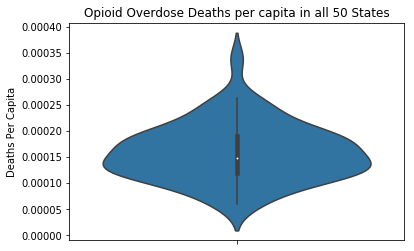

In [21]:
# visualize deaths per capita
dpc_violin = sns.violinplot(y='Deaths Per Capita', data=overdoses)
dpc_violin.set_title('Opioid Overdose Deaths per capita in all 50 States')

In [22]:
overdoses_dpc = overdoses.sort_values('Deaths Per Capita')

Text(0.5,1,'Opioid Overdose Deaths Per Capita by State')

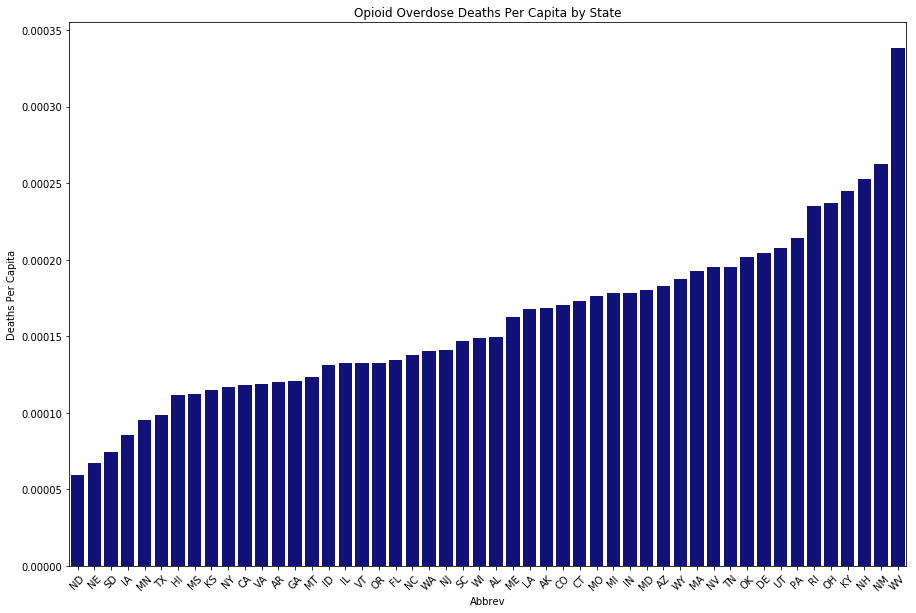

In [23]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Deaths Per Capita', data = overdoses_dpc, color = 'darkblue')
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Opioid Overdose Deaths Per Capita by State')

## *Providers Per Capita*

Text(0.5,1,'Prescribers Per Capita in all 50 States')

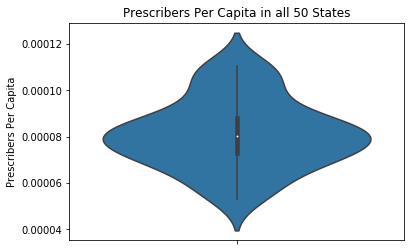

In [24]:
# Visualize prescribers per capita
prescriber_violin = sns.violinplot(y='Prescribers Per Capita', data=overdoses)
prescriber_violin.set_title('Prescribers Per Capita in all 50 States')

Text(0.5,1,'Prescribers Per Capita by State')

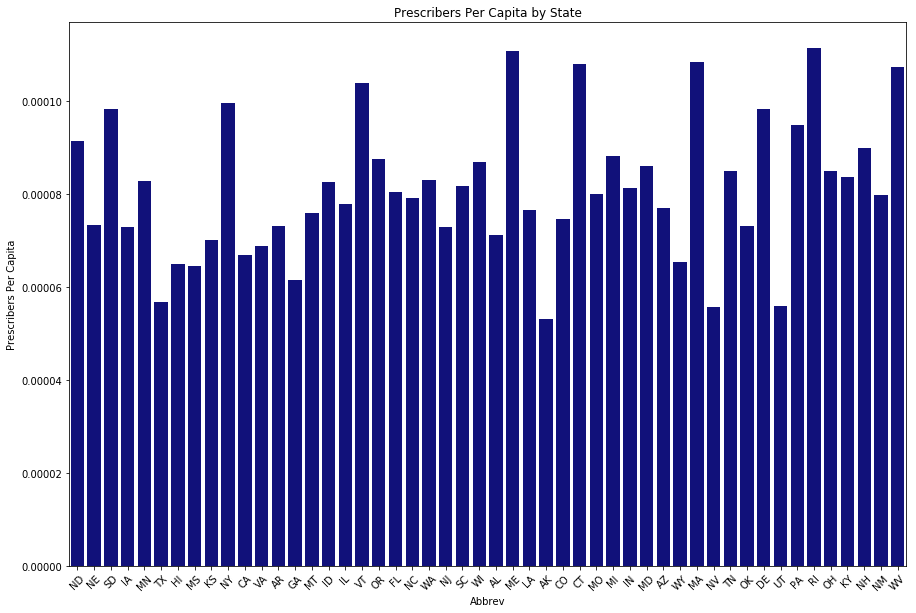

In [25]:
plt.subplots(figsize=(15,10))
dpc_bar = sns.barplot(x = 'Abbrev', y='Prescribers Per Capita', data = overdoses_dpc, color='darkblue')
dpc_bar.set_xticklabels(overdoses_dpc.Abbrev, rotation = 45)
dpc_bar.set_title('Prescribers Per Capita by State')

Text(0.5,1,'Deaths Per Capita versus Prescribers Per Capita')

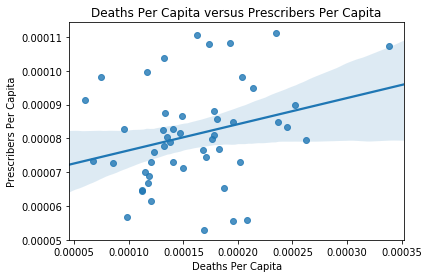

In [26]:
# Opioid overdoses per capita not directly correlated to prescribers per capita
dpc_ppc_line = sns.regplot(x='Deaths Per Capita', y = 'Prescribers Per Capita', data = overdoses)
dpc_ppc_line.set_title('Deaths Per Capita versus Prescribers Per Capita')

In [27]:
# Opioid Deaths Per Capita versus Opioid prescriptions per capita 

# Are there Regional/Divisional Differences?

Text(0.5,1,'Opioid Overdose Deaths per capita by region')

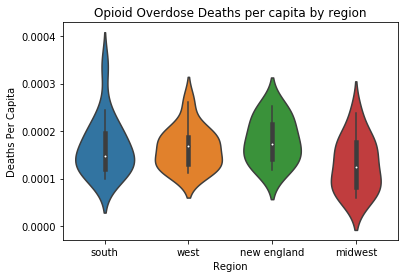

In [28]:
# repeat violin plot for deaths per capita, separate by region 
dpc_region_violin = sns.violinplot(x='Region', y='Deaths Per Capita', data=overdoses)
dpc_region_violin.set_title('Opioid Overdose Deaths per capita by region')

Text(0.5,1,'Prescribers Per Capita by Region')

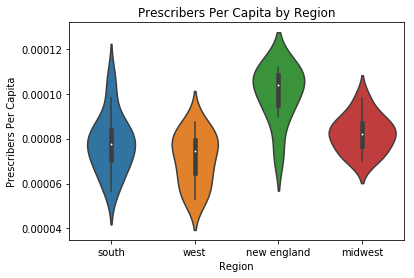

In [29]:
# prescribers per capita by region
prescriber_region_violin = sns.violinplot(x='Region', y='Prescribers Per Capita', data=overdoses)
prescriber_region_violin.set_title('Prescribers Per Capita by Region')

Text(0.5,1,'Non-Opioid vs. Opioid Prescriber by Region')

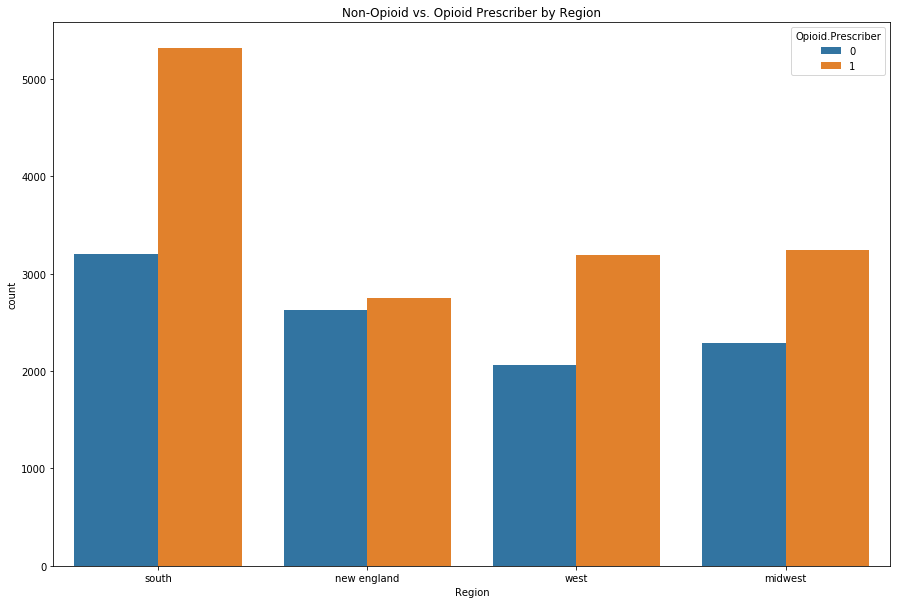

In [30]:
# normalize this
# opioid prescribers vs nonprescribers by region
plt.subplots(figsize=(15,10))
opioid_presc_count = sns.countplot(x='Region', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_count.set_title('Non-Opioid vs. Opioid Prescriber by Region')

## Divisions

Text(0.5,1,'Opioid Overdose Deaths per capita by Division')

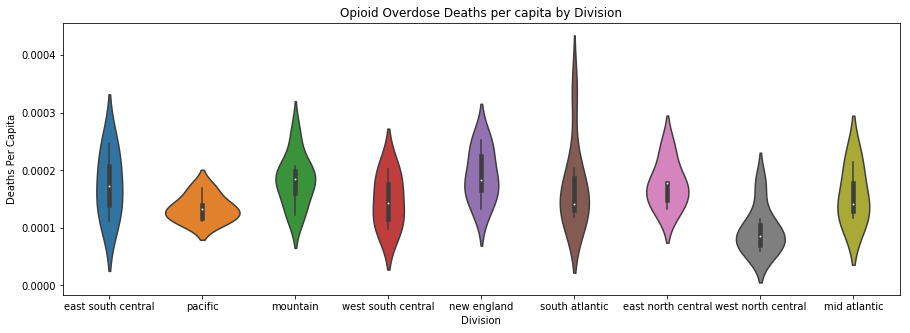

In [31]:
# repeat violin plot for deaths per capita, separate by region 
plt.subplots(figsize=(15,5))
dpc_division_violin = sns.violinplot(x='Division', y='Deaths Per Capita', data=overdoses)
dpc_division_violin.set_title('Opioid Overdose Deaths per capita by Division')

Text(0.5,1,'Prescribers Per Capita by Division')

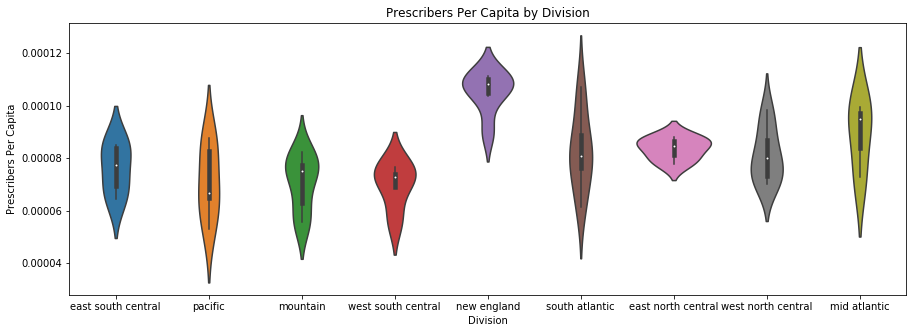

In [32]:
# prescribers per capita by division
plt.subplots(figsize=(15,5))
prescriber_division_violin = sns.violinplot(x='Division', y='Prescribers Per Capita', data=overdoses)
prescriber_division_violin.set_title('Prescribers Per Capita by Division')

Text(0.5,1,'Non-Opioid vs. Opiod Prescribers by division')

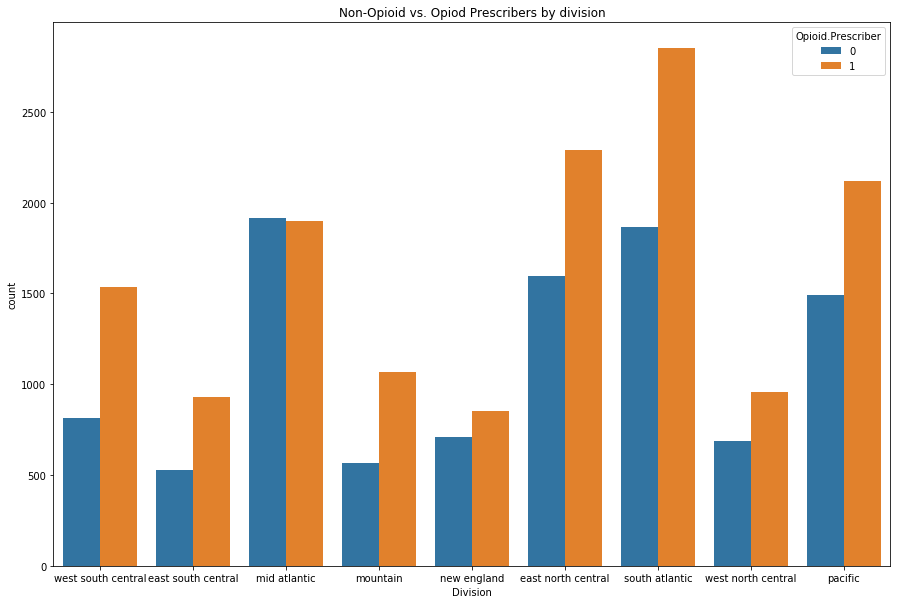

In [33]:
# opioid prescribers vs nonprescribers by division
plt.subplots(figsize=(15,10))
opioid_presc_bar = sns.countplot(x='Division', hue='Opioid.Prescriber', data=prescribers.merge(overdoses, how='left', on = 'Abbrev'))
opioid_presc_bar.set_title('Non-Opioid vs. Opiod Prescribers by division')

# Medical Practitioners and the Drugs they Prescribe

In [34]:
wv_prescribers = prescribers.loc[prescribers['Abbrev']=='WV'] # prescribers of highest per capita death rate state
nd_prescribers = prescribers.loc[prescribers['Abbrev']=='ND'] # prescribers of lowest per capita death rate state 

In [35]:
wv_prescribers.describe()

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,1.501603e+09,3.301508,1.874372,0.231156,8.809045,0.180905,6.025126,11.221106,31.361809,2.572864,...,2.919598,2.793970,1.105528,1.613065,26.467337,3.567839,7.110553,1.658291,13.391960,0.633166
std,2.820082e+08,18.844112,7.819898,1.619588,23.129056,1.465922,16.537511,31.155384,138.570041,12.244292,...,12.060184,12.933894,7.582803,8.577397,87.937292,19.432977,19.456448,9.243825,41.724289,0.483156
min,1.003090e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.255458e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.508820e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.720295e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,13.500000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.992796e+09,196.000000,65.000000,12.000000,212.000000,12.000000,112.000000,192.000000,1728.000000,109.000000,...,91.000000,145.000000,96.000000,77.000000,779.000000,218.000000,104.000000,106.000000,454.000000,1.000000


In [36]:
wv_prescribers = wv_prescribers.sort_values(by='Specialty')

In [37]:
wv_prescribers[:20]

,NPI,Gender,Abbrev,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
6879,1609802644,M,WV,MD,Allergy/Immunology,0,0,0,212,0,...,0,0,0,0,0,0,0,0,0,0
12998,1073517983,M,WV,M.D.,Allergy/Immunology,0,0,0,30,0,...,0,0,0,0,0,0,0,0,0,1
10723,1306810973,M,WV,M.D.,Anesthesiology,0,0,0,22,0,...,0,0,12,0,42,0,0,0,0,1
13171,1548343106,F,WV,CRNA,CRNA,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24394,1245299007,F,WV,MD,Cardiology,0,0,0,0,0,...,0,0,0,35,58,0,27,0,0,0
1983,1063403988,M,WV,M.D.,Cardiology,0,0,0,0,0,...,91,0,0,16,537,44,78,0,0,0
7583,1033186267,M,WV,NaN,Cardiology,0,0,0,0,0,...,0,0,0,0,419,133,0,0,0,0
13692,1982664181,M,WV,MD,Cardiology,0,0,0,63,0,...,0,0,0,0,222,0,47,0,15,1
24456,1942249826,M,WV,MD,Cardiology,0,0,0,12,0,...,0,0,0,15,221,218,103,0,0,0
10803,1508820093,F,WV,"CCNS, NP",Certified Clinical Nurse Specialist,63,0,0,0,0,...,0,0,0,0,0,0,0,28,0,0


(199, 256)


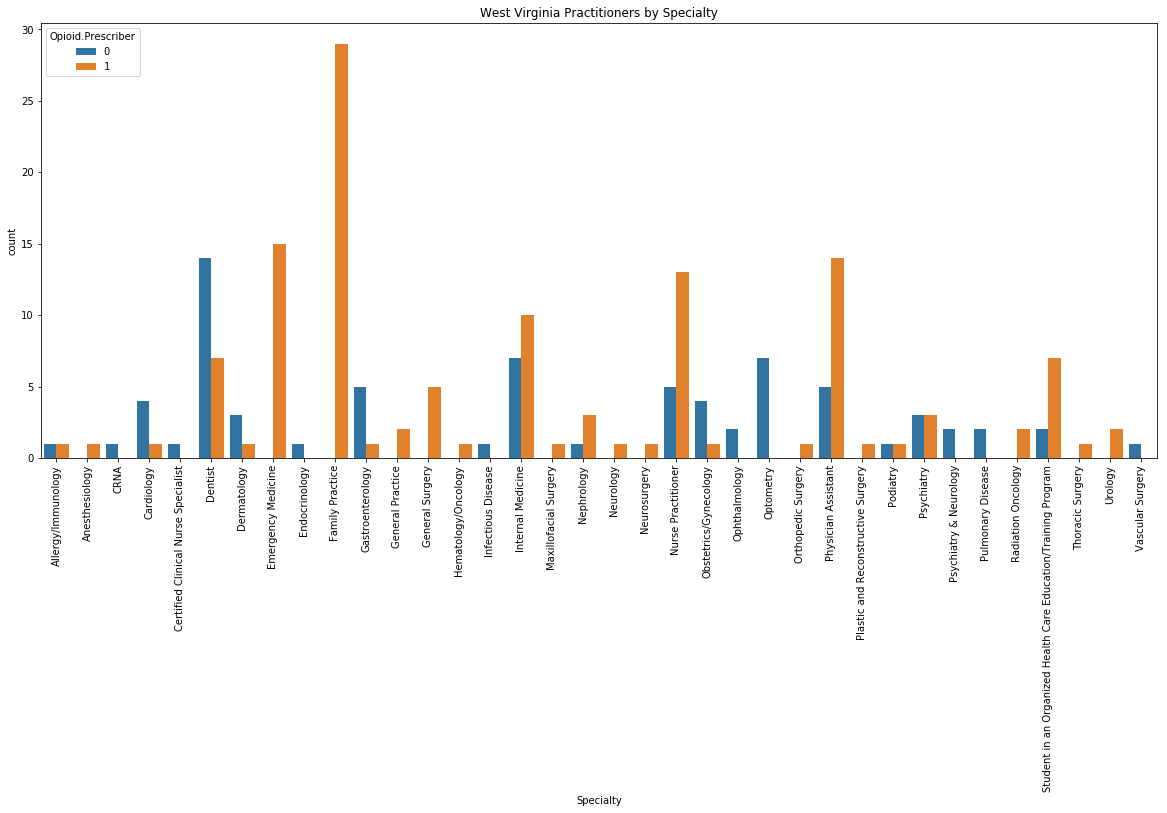

In [38]:

plt.subplots(figsize=(20,8))
wv_opioid_prescribers_byspecialty = sns.countplot(x='Specialty', data = wv_prescribers, hue='Opioid.Prescriber')
wv_opioid_prescribers_byspecialty.set_title('West Virginia Practitioners by Specialty')
wv_opioid_prescribers_byspecialty.set_xticklabels(wv_prescribers.Specialty.unique(), rotation = 90)
#for item in wv_opioid_prescribers_byspecialty.get_xticklabels():
 #   item.set_rotation(75)
print(wv_prescribers.shape)


Text(0.5,1,'Number of West Virginian Prescribers of each Specialty per 100 Prescribers')

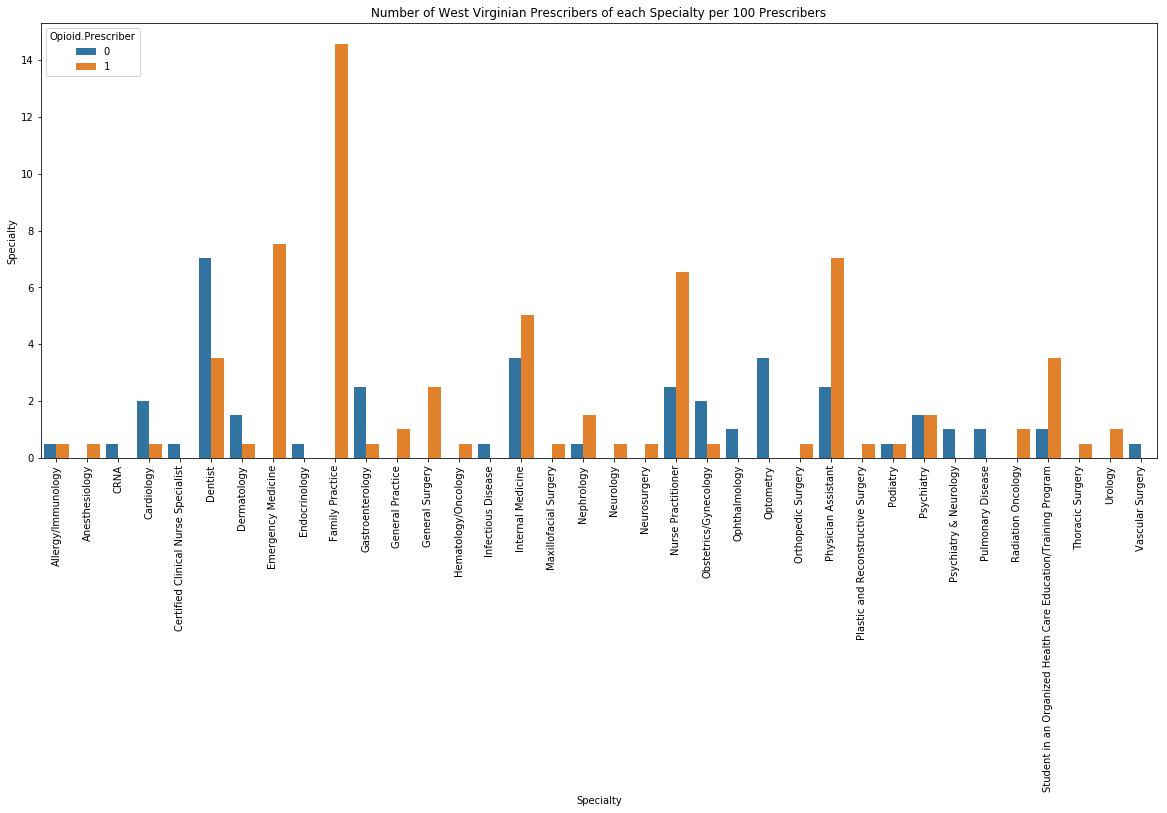

In [39]:
# this is not the best estimator, should actually use (x - np.mean(x)) / (np.max(x) - np.min(x)) but then x needs to be numeric instead of categorical 
plt.subplots(figsize=(20,8))
with_pct = sns.barplot(x="Specialty", y = 'Specialty', data=wv_prescribers, estimator=lambda x: len(x) / len(wv_prescribers) * 100, hue = 'Opioid.Prescriber', orient = 'v')
with_pct.set_xticklabels(wv_prescribers.Specialty.unique(), rotation = 90)
with_pct.set_title('Number of West Virginian Prescribers of each Specialty per 100 Prescribers')

In [40]:
nd_prescribers.describe()

,NPI,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
count,6.600000e+01,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,1.486702e+09,1.606061,2.181818,1.272727,9.954545,0.939394,12.939394,15.348485,8.090909,2.469697,...,3.621212,2.000000,0.924242,0.787879,27.787879,1.424242,4.363636,0.787879,7.348485,0.590909
std,2.886000e+08,5.448723,9.488307,5.484371,23.246791,4.653795,28.258085,34.467149,27.917310,7.465242,...,8.796442,7.306478,4.581940,4.521794,63.612895,8.061419,13.633258,6.400758,19.755032,0.495434
min,1.003952e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.245295e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.487817e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.727667e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,16.250000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.992729e+09,28.000000,68.000000,31.000000,123.000000,31.000000,105.000000,168.000000,203.000000,30.000000,...,46.000000,40.000000,30.000000,29.000000,360.000000,62.000000,65.000000,52.000000,112.000000,1.000000


(66, 256)


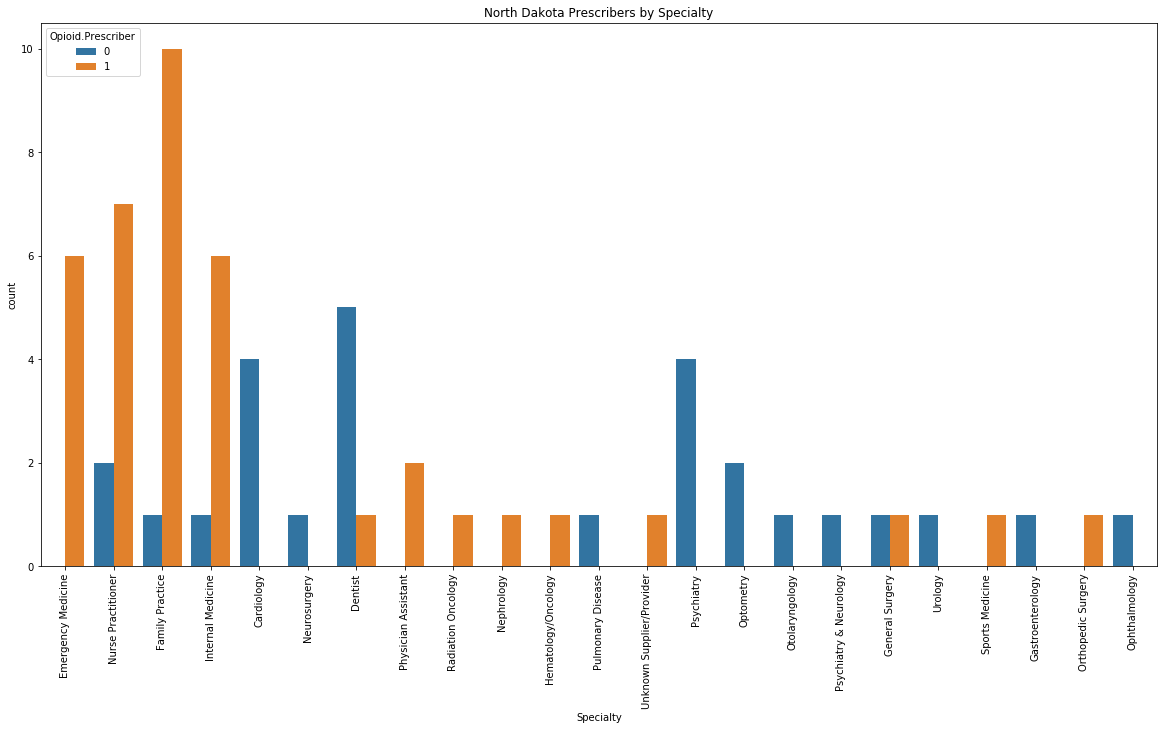

In [41]:
plt.subplots(figsize=(20,10))

nd_opioid_prescribers_byspecialty = sns.countplot(x='Specialty', hue = 'Opioid.Prescriber', data = nd_prescribers)
nd_opioid_prescribers_byspecialty.set_title('North Dakota Prescribers by Specialty')
nd_opioid_prescribers_byspecialty.set_xticklabels(nd_prescribers.Specialty.unique(), rotation=90)
print(nd_prescribers.shape)

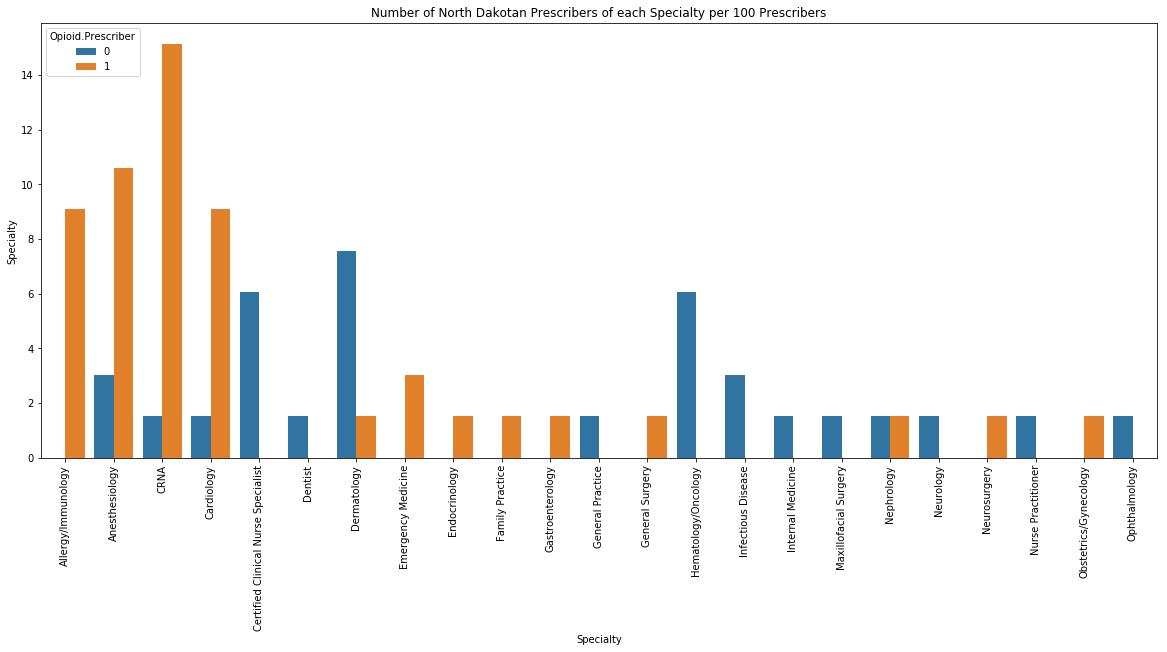

In [86]:
# this is not the best estimator, should actually use (x - np.mean(x)) / (np.max(x) - np.min(x)) but then x needs to be numeric instead of categorical 
plt.subplots(figsize=(20,8))
with_pct = sns.barplot(x="Specialty", y = 'Specialty', data=nd_prescribers, estimator=lambda x: len(x) / len(nd_prescribers) * 100, hue = 'Opioid.Prescriber', orient = 'v')
_ = with_pct.set_xticklabels(wv_prescribers.Specialty.unique(), rotation = 90)
_ = with_pct.set_title('Number of North Dakotan Prescribers of each Specialty per 100 Prescribers')

### Number of Prescribers in each state

In [43]:
print(prescribers.shape)

(25000, 256)


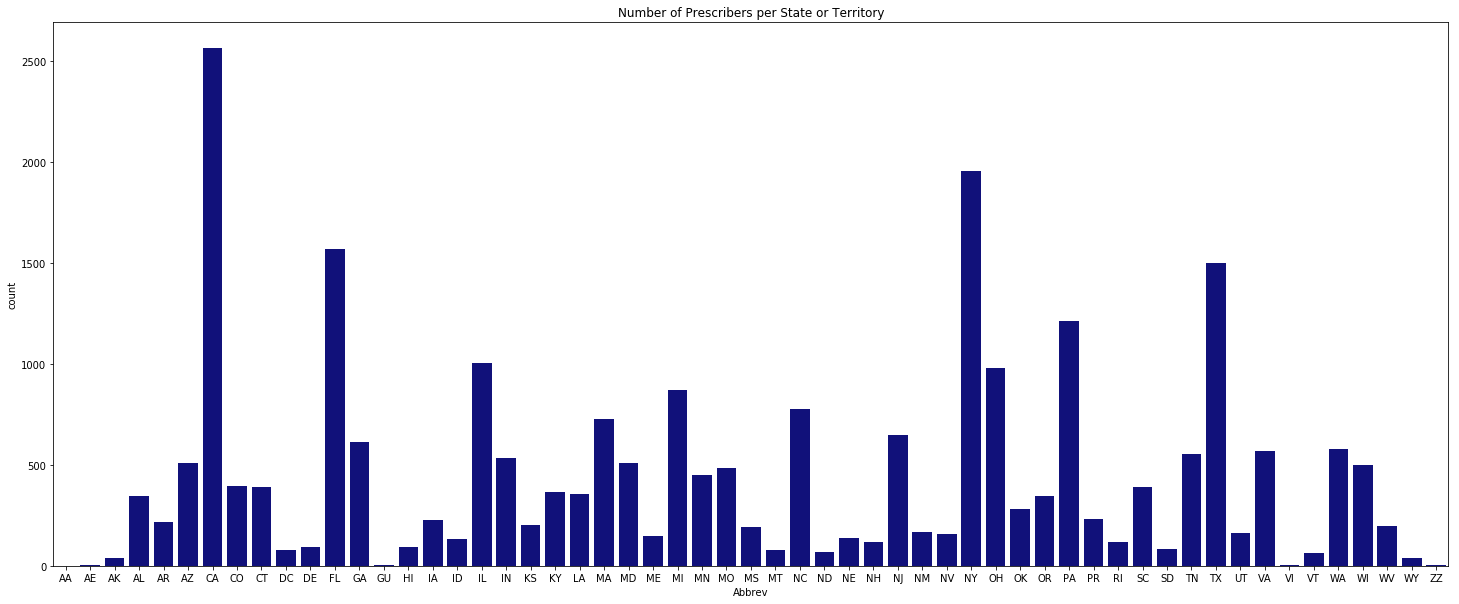

In [84]:
_ = plt.subplots(figsize=(25,10))
practitioner_count = sns.countplot(x='Abbrev', data=prescribers.sort_values('Abbrev'), color = 'darkblue')
_ = practitioner_count.set_title('Number of Prescribers per State or Territory')

### Legend for some unfamiliar abbreviations:
* AA - Armed Forces Americas 
* AE - Armed Forces Africa
* GU - Guam
* VI - US Virgin Islands
* ZZ - ???

## States Only Prescriber Counts

In [45]:
prescribers_states = prescribers[~prescribers.Abbrev.isin(['AA', 'AE', 'GU', 'VI', 'ZZ'])]

(24990, 256)


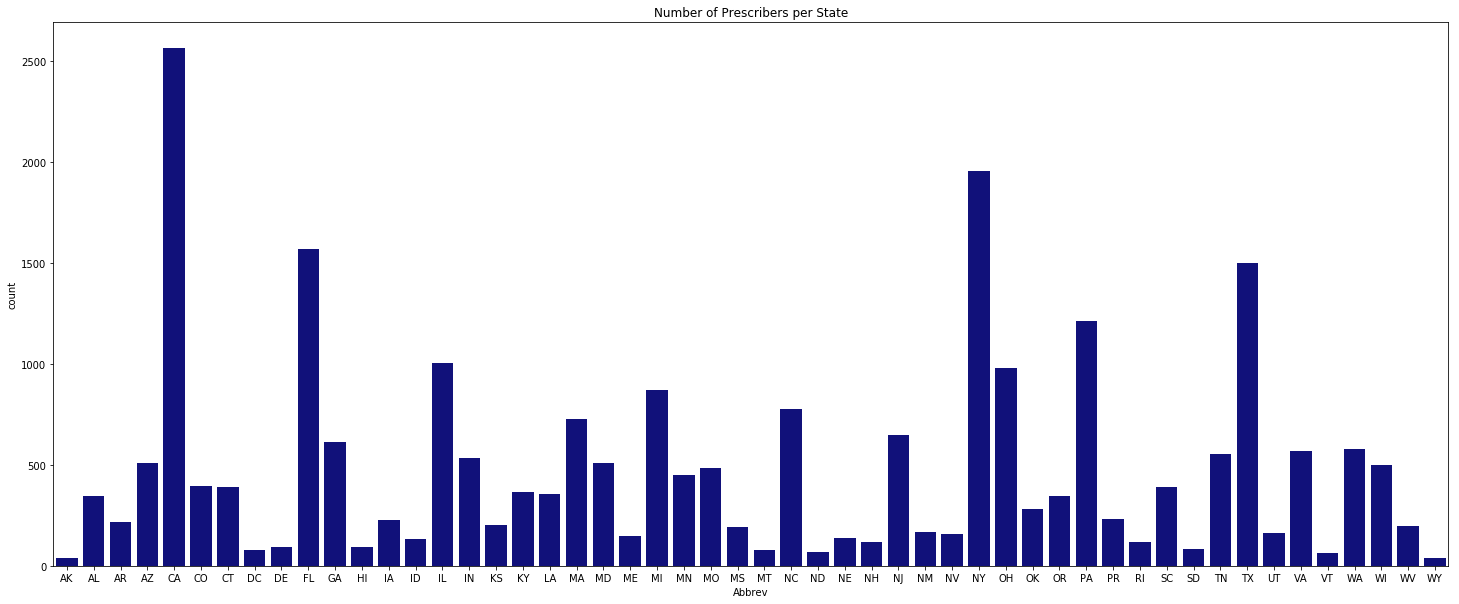

In [83]:
_ = plt.subplots(figsize=(25,10))
states_practitioner_count = sns.countplot(x='Abbrev', data=prescribers_states.sort_values('Abbrev'), color = 'darkblue')
_ = states_practitioner_count.set_title('Number of Prescribers per State')
print(prescribers_states.shape)

## Specialties with many prescribers 

### At least 100 prescribers: 

In [47]:
specialty_counts = prescribers.Specialty.value_counts()
print('Total specialties recorded: {}'.format(len(specialty_counts)))
print('Specialties with > 100 prescribers recorded: {}'.format(len(specialty_counts[specialty_counts > 100])))

Total specialties recorded: 109
Specialties with > 100 prescribers recorded: 33


In [48]:
specialty_counts[specialty_counts > 100].describe()

count      33.000000
mean      713.484848
std       883.124252
min       117.000000
25%       218.000000
50%       369.000000
75%       615.000000
max      3194.000000
Name: Specialty, dtype: float64

In [49]:
specialty_counts[specialty_counts > 100]

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro

### At least 50 prescribers

In [50]:
specialty_counts[specialty_counts > 50].describe()

count      43.000000
mean      564.162791
std       818.292616
min        52.000000
25%       119.000000
50%       260.000000
75%       559.000000
max      3194.000000
Name: Specialty, dtype: float64

In [51]:
specialty_counts[specialty_counts > 50]

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro

In [80]:
popular_specialty = list(specialty_counts[specialty_counts > 50].index)

# Which drugs are prescribed most often? 

In [52]:
tracked_drugs = list(prescribers.columns)[5:-1]
# Which drugs are most often prescribed? 
prescribers[tracked_drugs].aggregate(sum).sort_values(ascending = False)

LISINOPRIL                        1176243
LEVOTHYROXINE.SODIUM              1144724
AMLODIPINE.BESYLATE               1107865
SIMVASTATIN                       1032511
OMEPRAZOLE                        1012238
ATORVASTATIN.CALCIUM               988910
HYDROCODONE.ACETAMINOPHEN          958082
FUROSEMIDE                         828161
METFORMIN.HCL                      715162
METOPROLOL.TARTRATE                657013
GABAPENTIN                         654491
LOSARTAN.POTASSIUM                 553719
HYDROCHLOROTHIAZIDE                536818
METOPROLOL.SUCCINATE               522404
WARFARIN.SODIUM                    479951
CLOPIDOGREL                        452530
PRAVASTATIN.SODIUM                 451433
CARVEDILOL                         415007
TRAMADOL.HCL                       406693
ALPRAZOLAM                         403203
ATENOLOL                           394700
POTASSIUM.CHLORIDE                 385786
TAMSULOSIN.HCL                     367304
PANTOPRAZOLE.SODIUM               

Things that might be interesting to look at here: 
* Can proportion of "rare drugs" vs "common drugs" be an indicator of a certain type of provider? (probably identifies specialists pretty ok)

# Which tracked drugs are opioids?  
### The problem: Right now, it's hard to tell which drugs providers prescribe are actually opioids using opioids.csv

In [53]:
#Which drugs are easily recognized? 
opioid_names = opioids['Drug Name']
detected_opioids = set(tracked_drugs).intersection(set(opioid_names))
print(detected_opioids)

{'FENTANYL', 'OXYCONTIN'}


In [54]:
# this is definitely a problem: 
tracked_drugs[:10]

['ABILIFY',
 'ACETAMINOPHEN.CODEINE',
 'ACYCLOVIR',
 'ADVAIR.DISKUS',
 'AGGRENOX',
 'ALENDRONATE.SODIUM',
 'ALLOPURINOL',
 'ALPRAZOLAM',
 'AMIODARONE.HCL',
 'AMITRIPTYLINE.HCL']

In [55]:
opioid_names[:10]

0                           ABSTRAL
1             ACETAMINOPHEN-CODEINE
2                             ACTIQ
3               ASCOMP WITH CODEINE
4    ASPIRIN-CAFFEINE-DIHYDROCODEIN
5                            AVINZA
6                  BELLADONNA-OPIUM
7                 BUPRENORPHINE HCL
8    BUTALB-ACETAMINOPH-CAFF-CODEIN
9    BUTALB-CAFF-ACETAMINOPH-CODEIN
Name: Drug Name, dtype: object

Acetaminophen/Codeine (a well-known opioid) appears in both lists! 

In [56]:
# Looks like hyphens, spaces, and "withs" are a problem 
opioid_names=opioid_names.apply(lambda s: s.replace('-','.'))
opioid_names=opioid_names.apply(lambda s: s.replace('WITH ',''))
opioid_names=opioid_names.apply(lambda s: s.replace(' ','.'))
detected_opioids = list(set(tracked_drugs).intersection(set(opioid_names)))
print(len(detected_opioids))
print(detected_opioids)

11
['HYDROMORPHONE.HCL', 'MORPHINE.SULFATE', 'HYDROCODONE.ACETAMINOPHEN', 'MORPHINE.SULFATE.ER', 'TRAMADOL.HCL', 'OXYCODONE.HCL', 'OXYCONTIN', 'ACETAMINOPHEN.CODEINE', 'FENTANYL', 'OXYCODONE.ACETAMINOPHEN', 'METHADONE.HCL']


In [57]:
opioid_selector = []
for row in prescribers[detected_opioids].values == [0]*11: 
    if False in row: 
        opioid_selector.append(True)
    else:
        opioid_selector.append(False)

opioid_prescribers = prescribers[opioid_selector]
nonopioid_prescribers = prescribers[[ not s for s in opioid_selector]]

## Understanding Opioid.Prescriber
From the kaggle dataset description: Opioid.Prescriber = 1 if the provider has prescribed a known opioid more than 10 times. 

There's a subtelty here: we only track the prescription amounts of the 250 most common drugs. Of those, only 11 are opioids. These are contained in the set `detected_opioids`

In [58]:
print(opioid_prescribers['Opioid.Prescriber'].unique()) # All opioid prescribers prescribed one of the 11 
print(nonopioid_prescribers['Opioid.Prescriber'].unique()) # But other opioids definitely get presccribed. 

[1]
[0 1]


In [59]:
nonopioid_outliers = nonopioid_prescribers.loc[nonopioid_prescribers['Opioid.Prescriber']==1].copy()

In [60]:
def provider_drugs(npi, df= prescribers, track_list = tracked_drugs):
    '''
    Given a provider NPI, returns a list of the drugs the provider prescribed
    Grabs this info from the prescribers database unless otherwise instructed, 
    Grabs info about which drugs are being tracked from tracked_drugs (built from prescribers)
    unless otherwise noted. 
    
    With track_list = detected_opioids, this returns the opioids the provdier has prescribed! :)
    '''
    row = df[prescribers.NPI==npi]
    all_drugs = row[track_list].transpose()
    all_drugs.columns = ['num_prescriptions']
    return list(all_drugs.iloc[all_drugs.num_prescriptions.nonzero()].index)

In [61]:
nonopioid_outliers['prescribed_drugs']= nonopioid_outliers['NPI'].apply(provider_drugs)

In [62]:
prescribers['prescribed_drugs'] = prescribers['NPI'].apply(provider_drugs)

In [97]:
popular_specialty_prescribers = prescribers.loc[prescribers['Specialty'].isin(popular_specialty)][['NPI', 'Specialty', 'prescribed_drugs', 'Opioid.Prescriber']].copy().sort_values(by=['Specialty'])
popular_specialty_prescribers['drug_count']=popular_specialty_prescribers['prescribed_drugs'].apply(len)

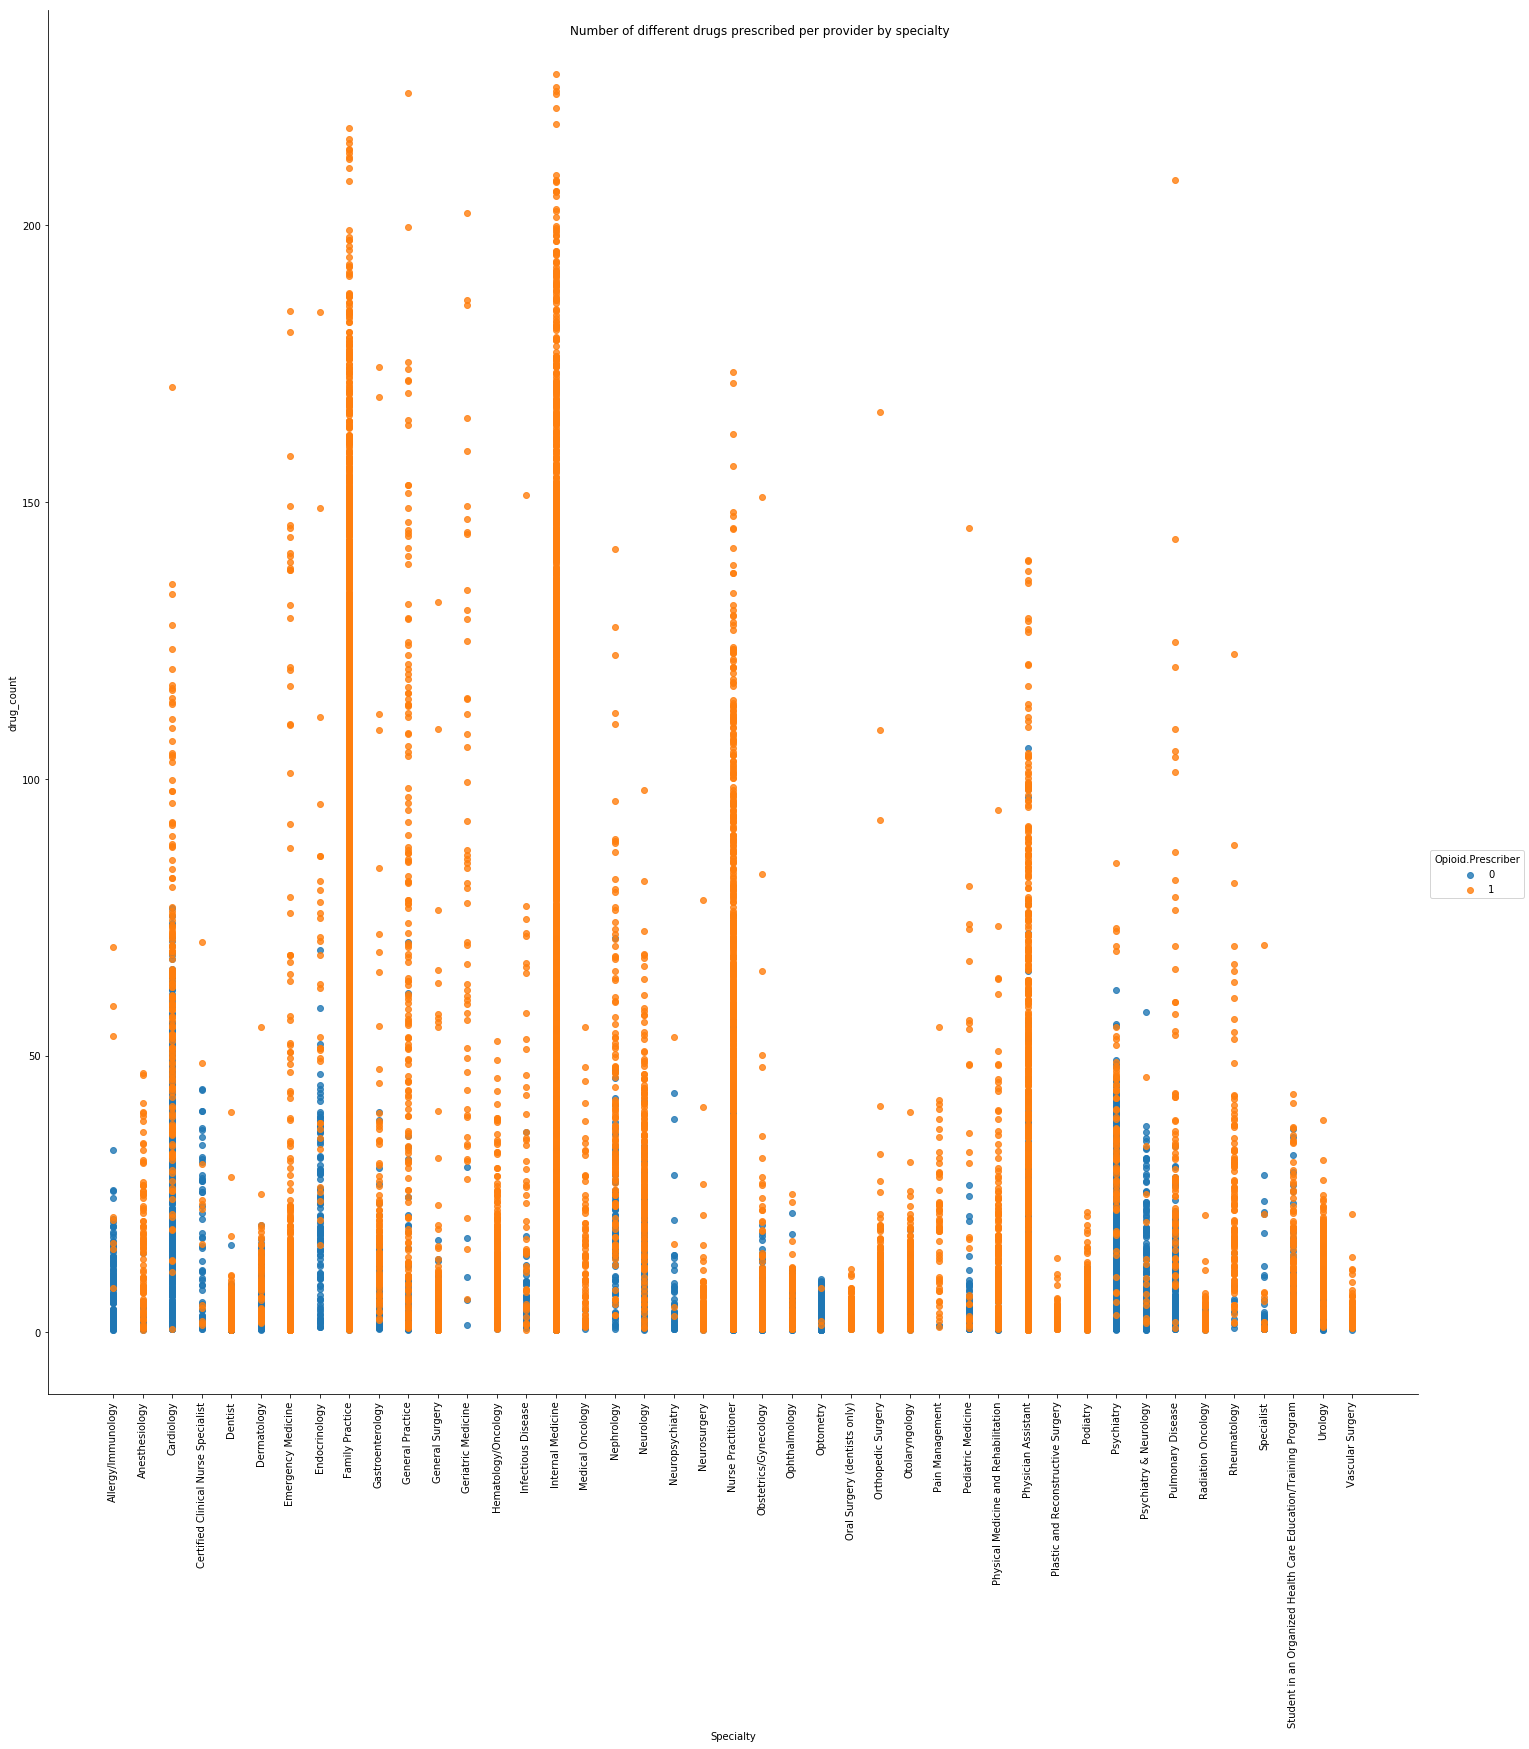

In [98]:
# this still needs some work 
num_drugs_presc = sns.lmplot(x='Specialty', y = 'drug_count', hue='Opioid.Prescriber', y_jitter = .5, data=popular_specialty_prescribers, fit_reg=False, size=20)
_ = num_drugs_presc.set_xticklabels(rotation = 90)
fig = num_drugs_presc.fig 
_ = fig.suptitle('Number of different drugs prescribed per provider by specialty')

In [120]:
popular_specialty_prescribers.groupby(['Specialty'], sort=False)['drug_count'].max()

Specialty
Allergy/Immunology                                                 70
Anesthesiology                                                     47
Cardiology                                                        171
Certified Clinical Nurse Specialist                                71
Dentist                                                            40
Dermatology                                                        55
Emergency Medicine                                                185
Endocrinology                                                     184
Family Practice                                                   218
Gastroenterology                                                  174
General Practice                                                  224
General Surgery                                                   132
Geriatric Medicine                                                202
Hematology/Oncology                                                53
Infectious

In [104]:
limit = 50 
low_drug = popular_specialty_prescribers.loc[popular_specialty[popular_specialty_prescribers.groupby(['Specialty'], sort=False)['drug_count'].max() <=limit]
low_drug_specialties = sns.lmplot(x='Specialty', y = 'drug_count', hue='Opioid.Prescriber', y_jitter = .5, data=low_drug, fit_reg=False, size=20)
_ = low_drug_specialties.set_xticklabels(rotation = 90)
fig = low_drug_specialties.fig 
_ = fig.suptitle('Number of different drugs prescribed per provider by specialty, Limit {}'.format(limit))

SyntaxError: invalid syntax (<ipython-input-104-dcad0f39429c>, line 3)

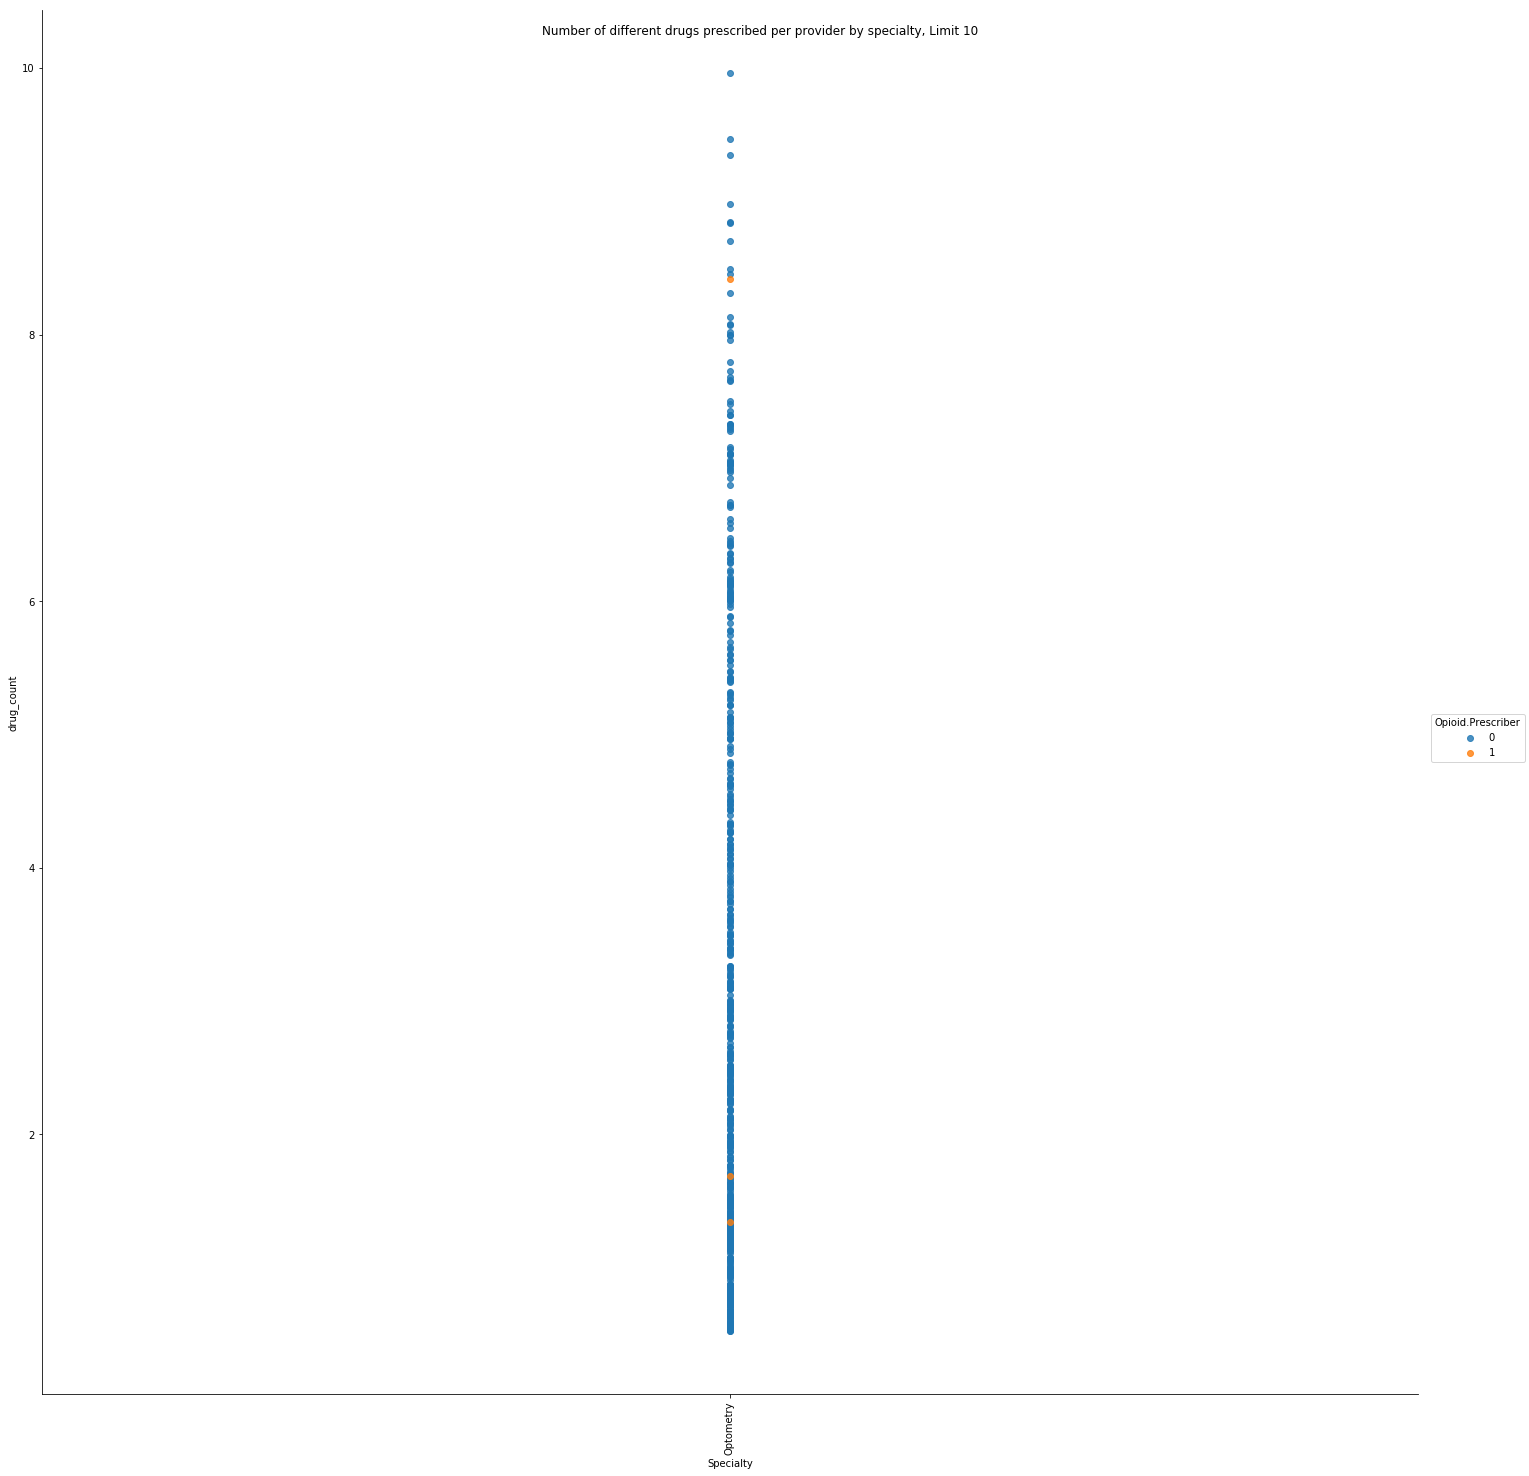

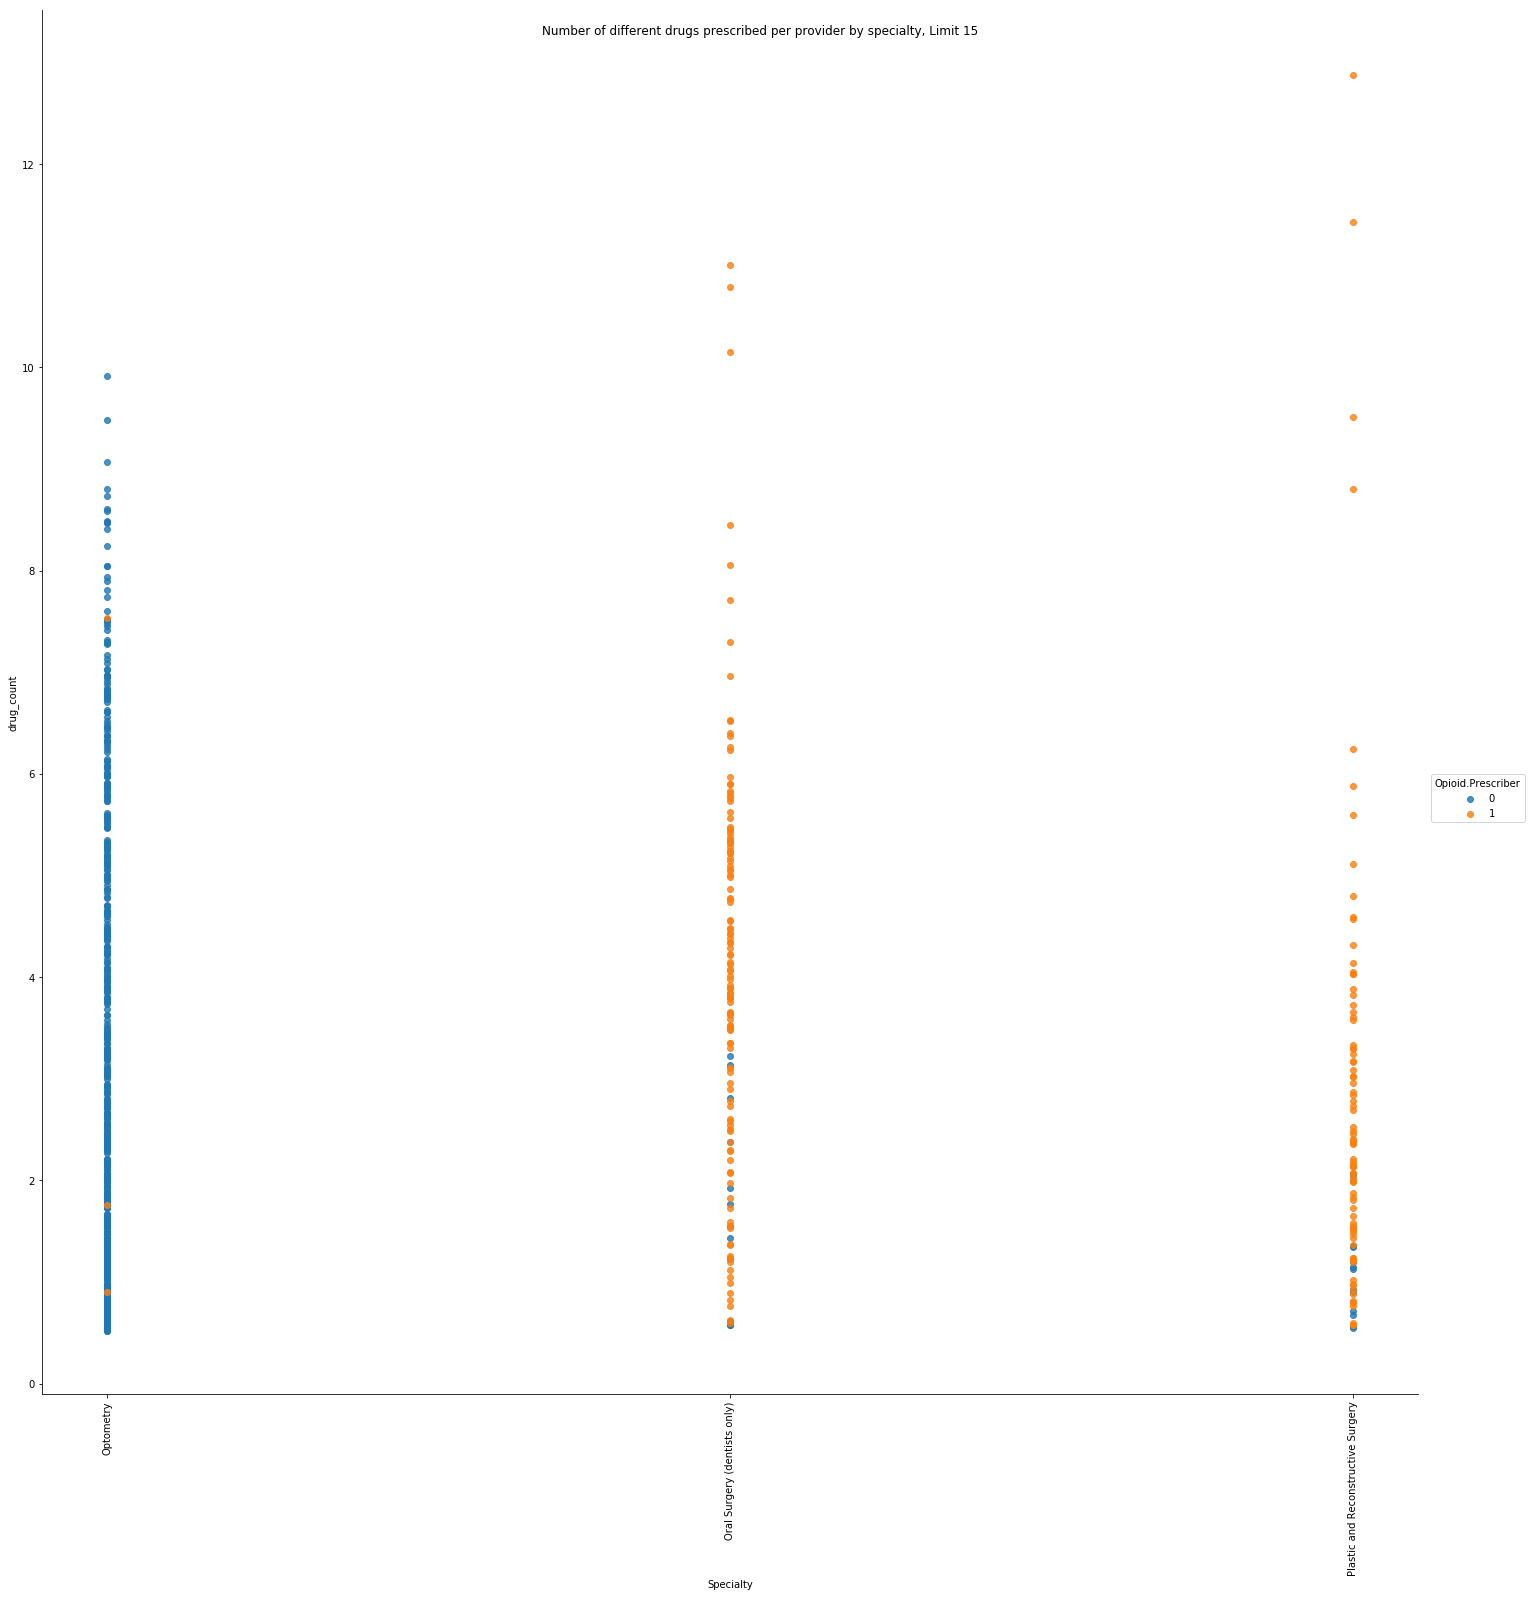

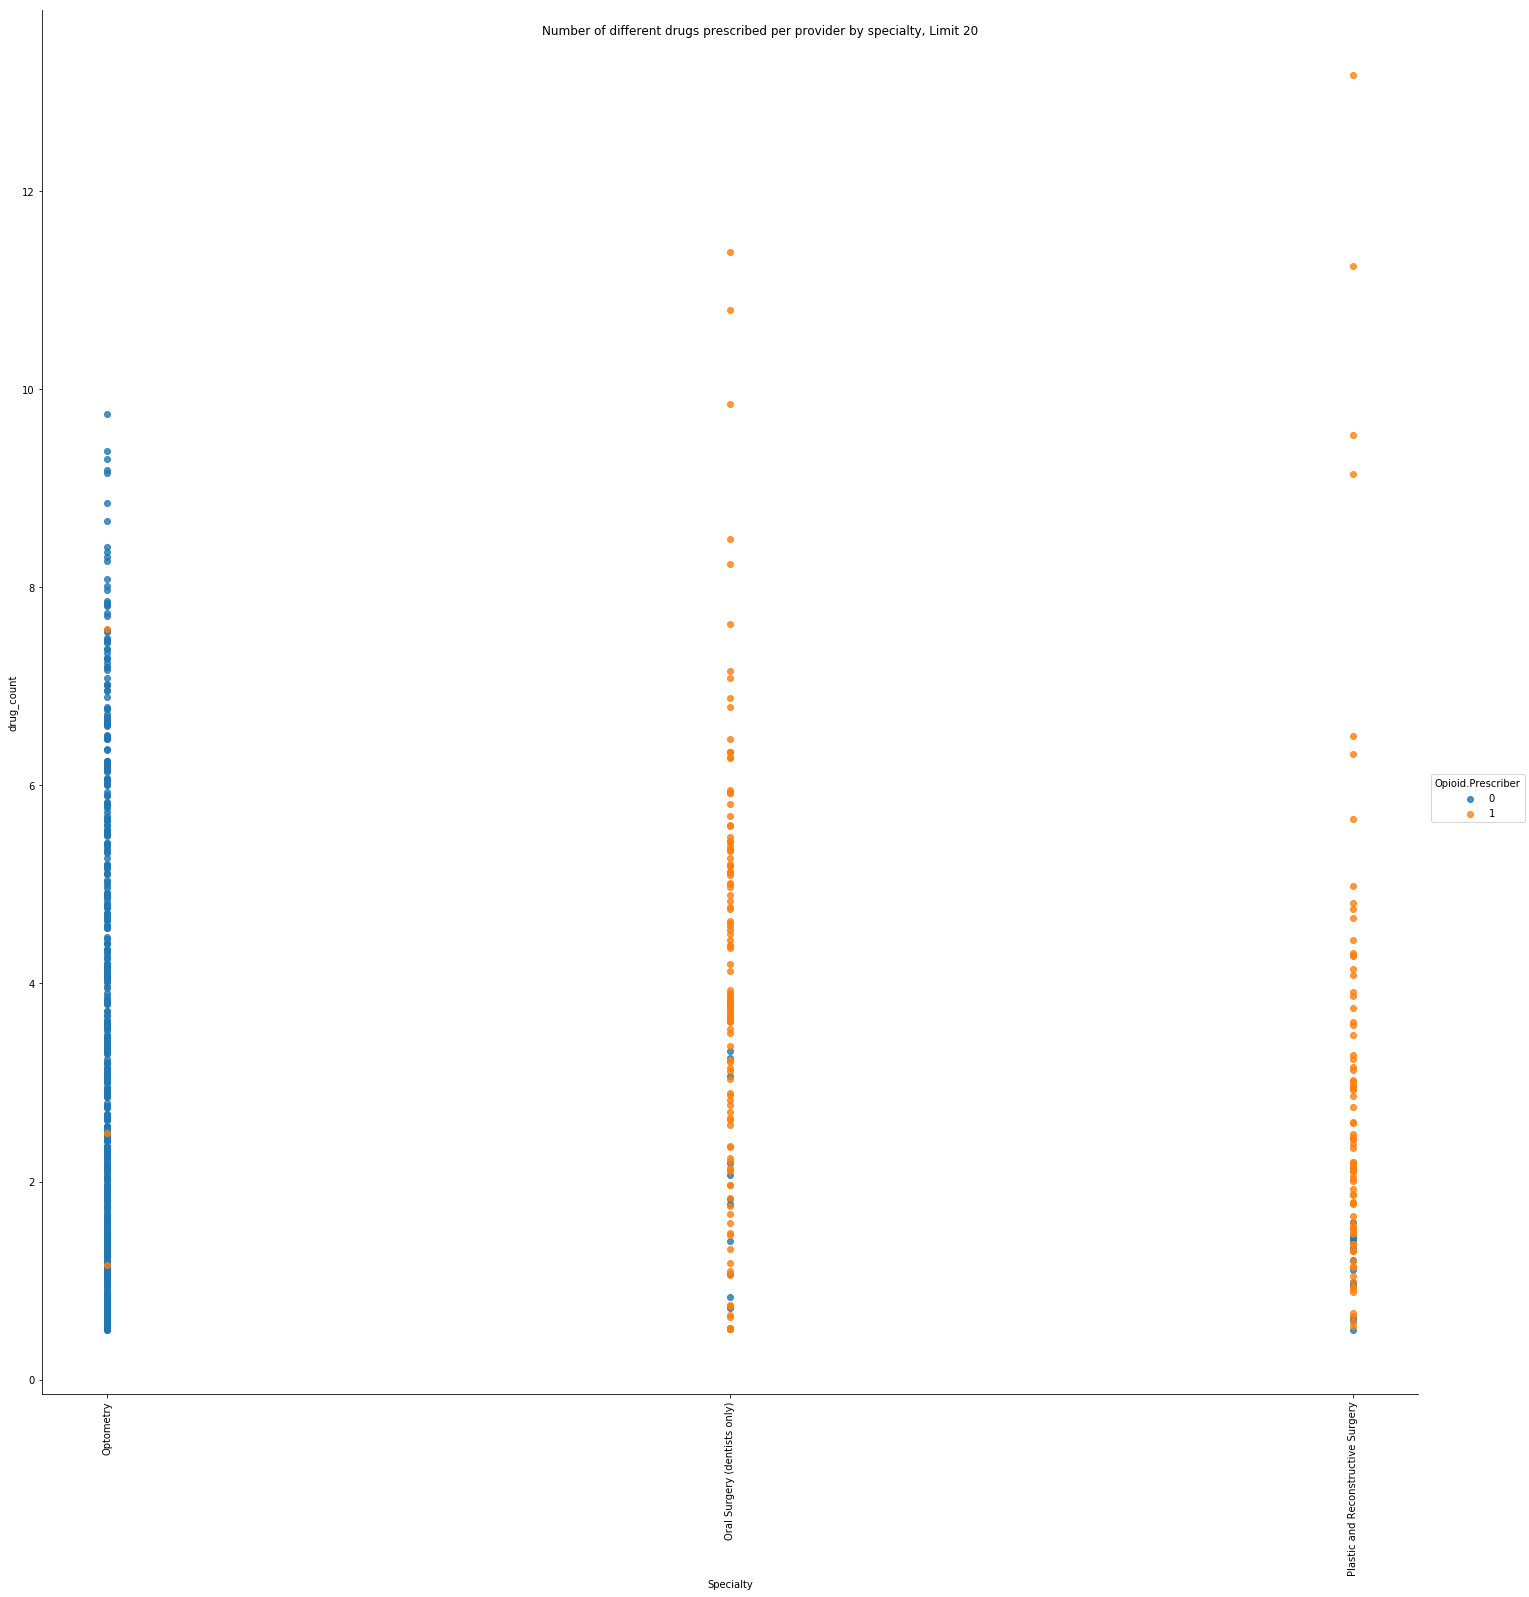

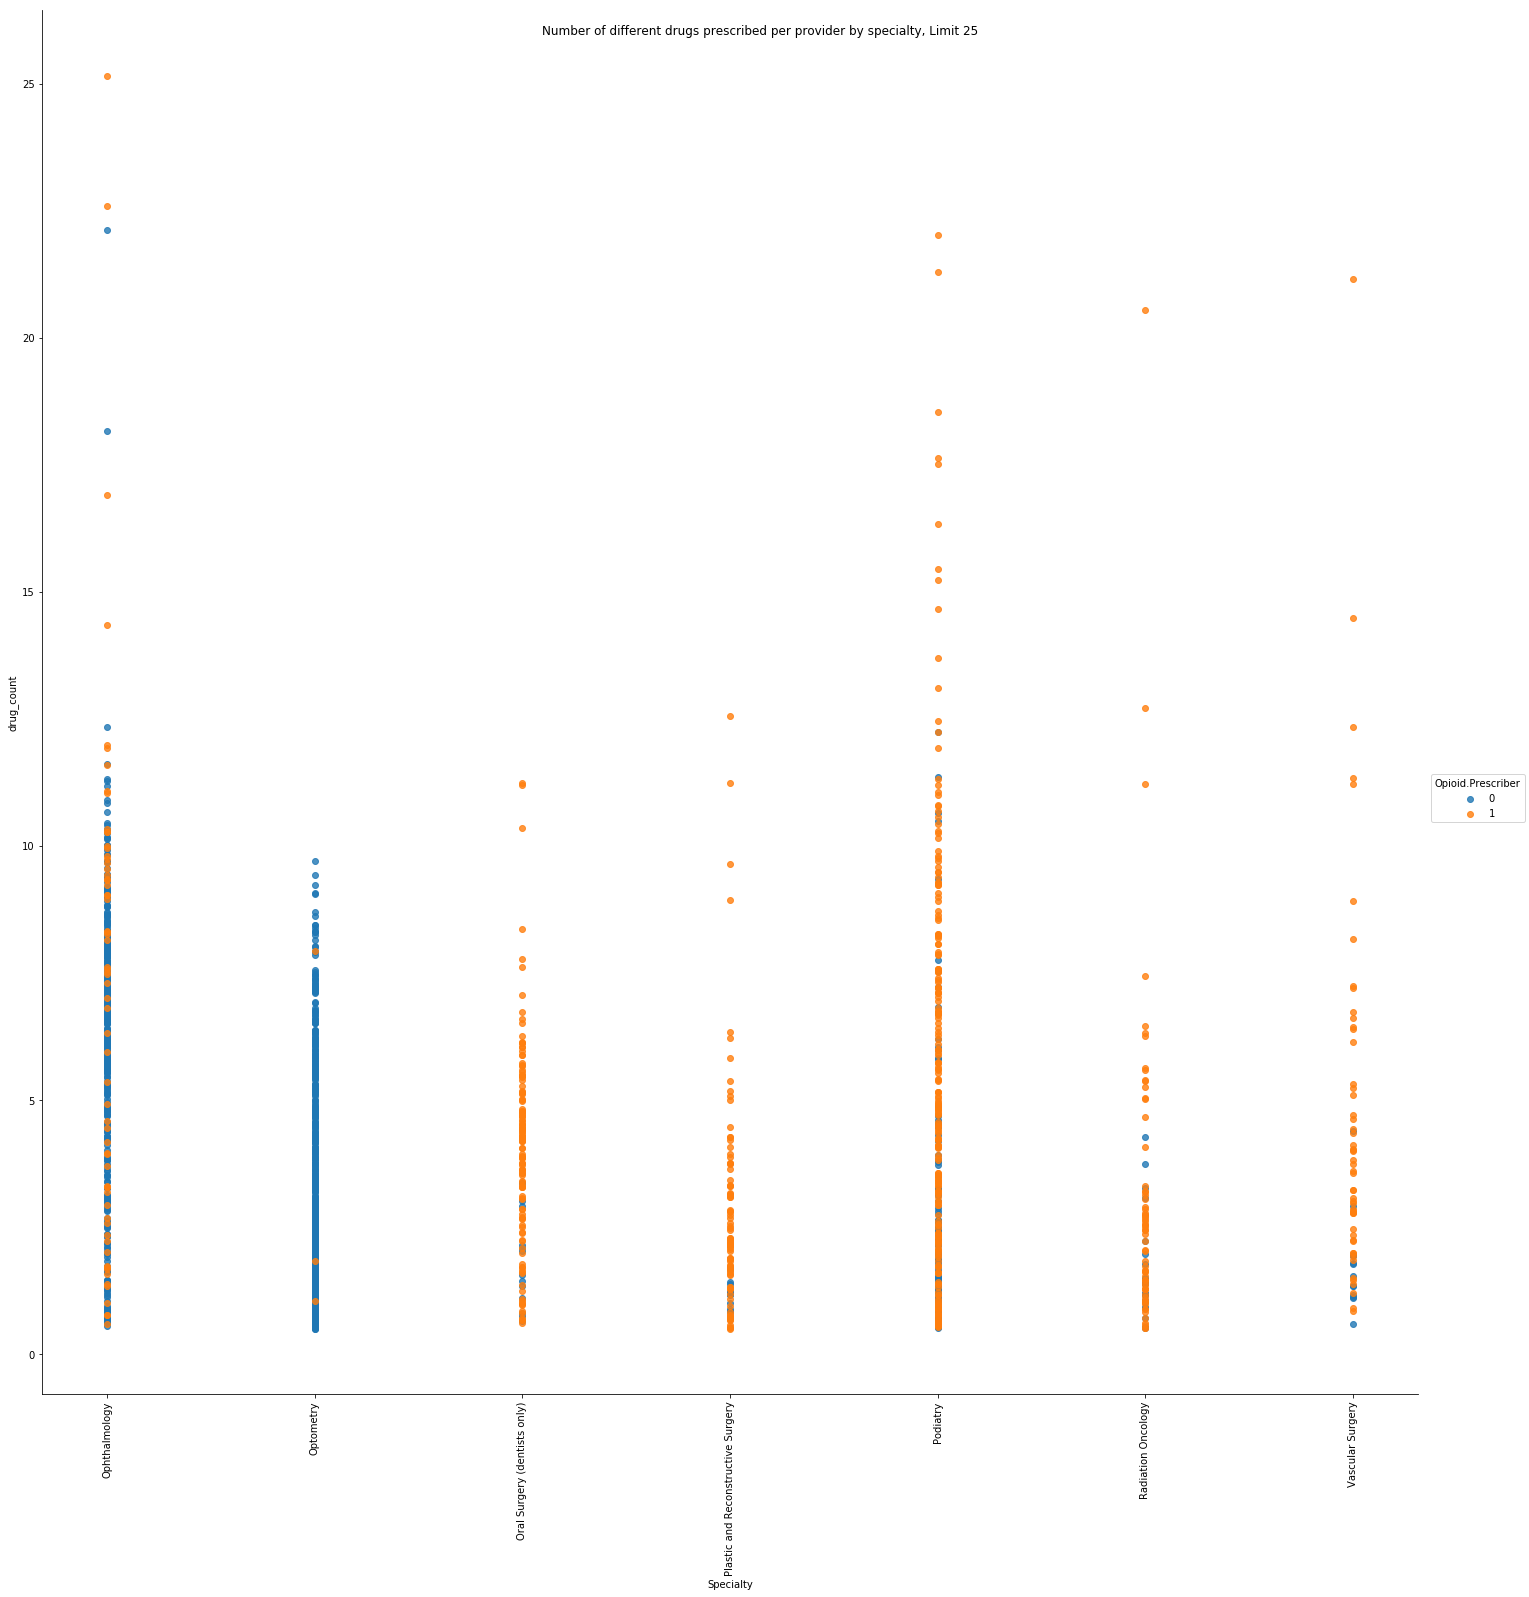

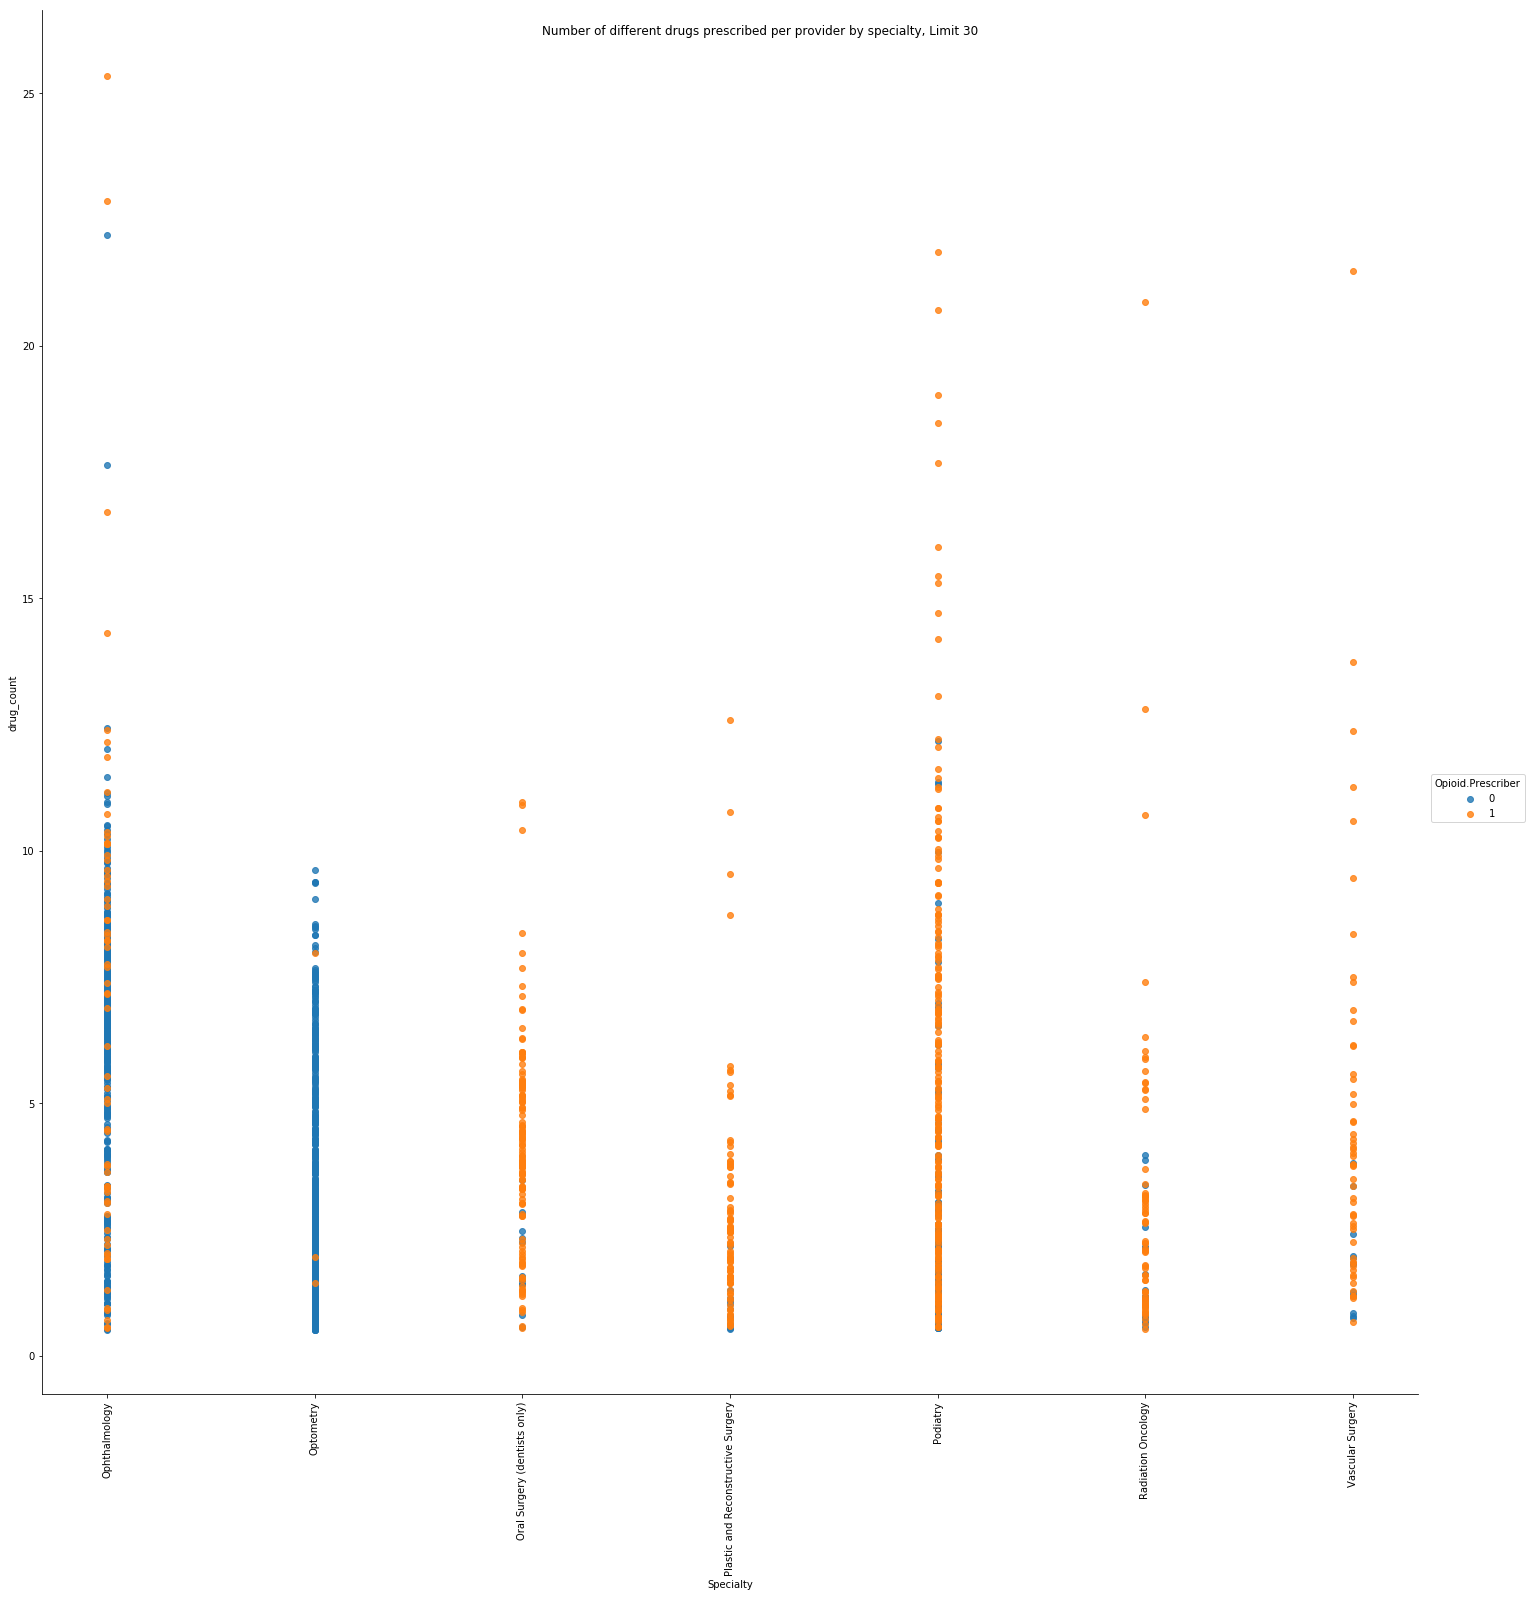

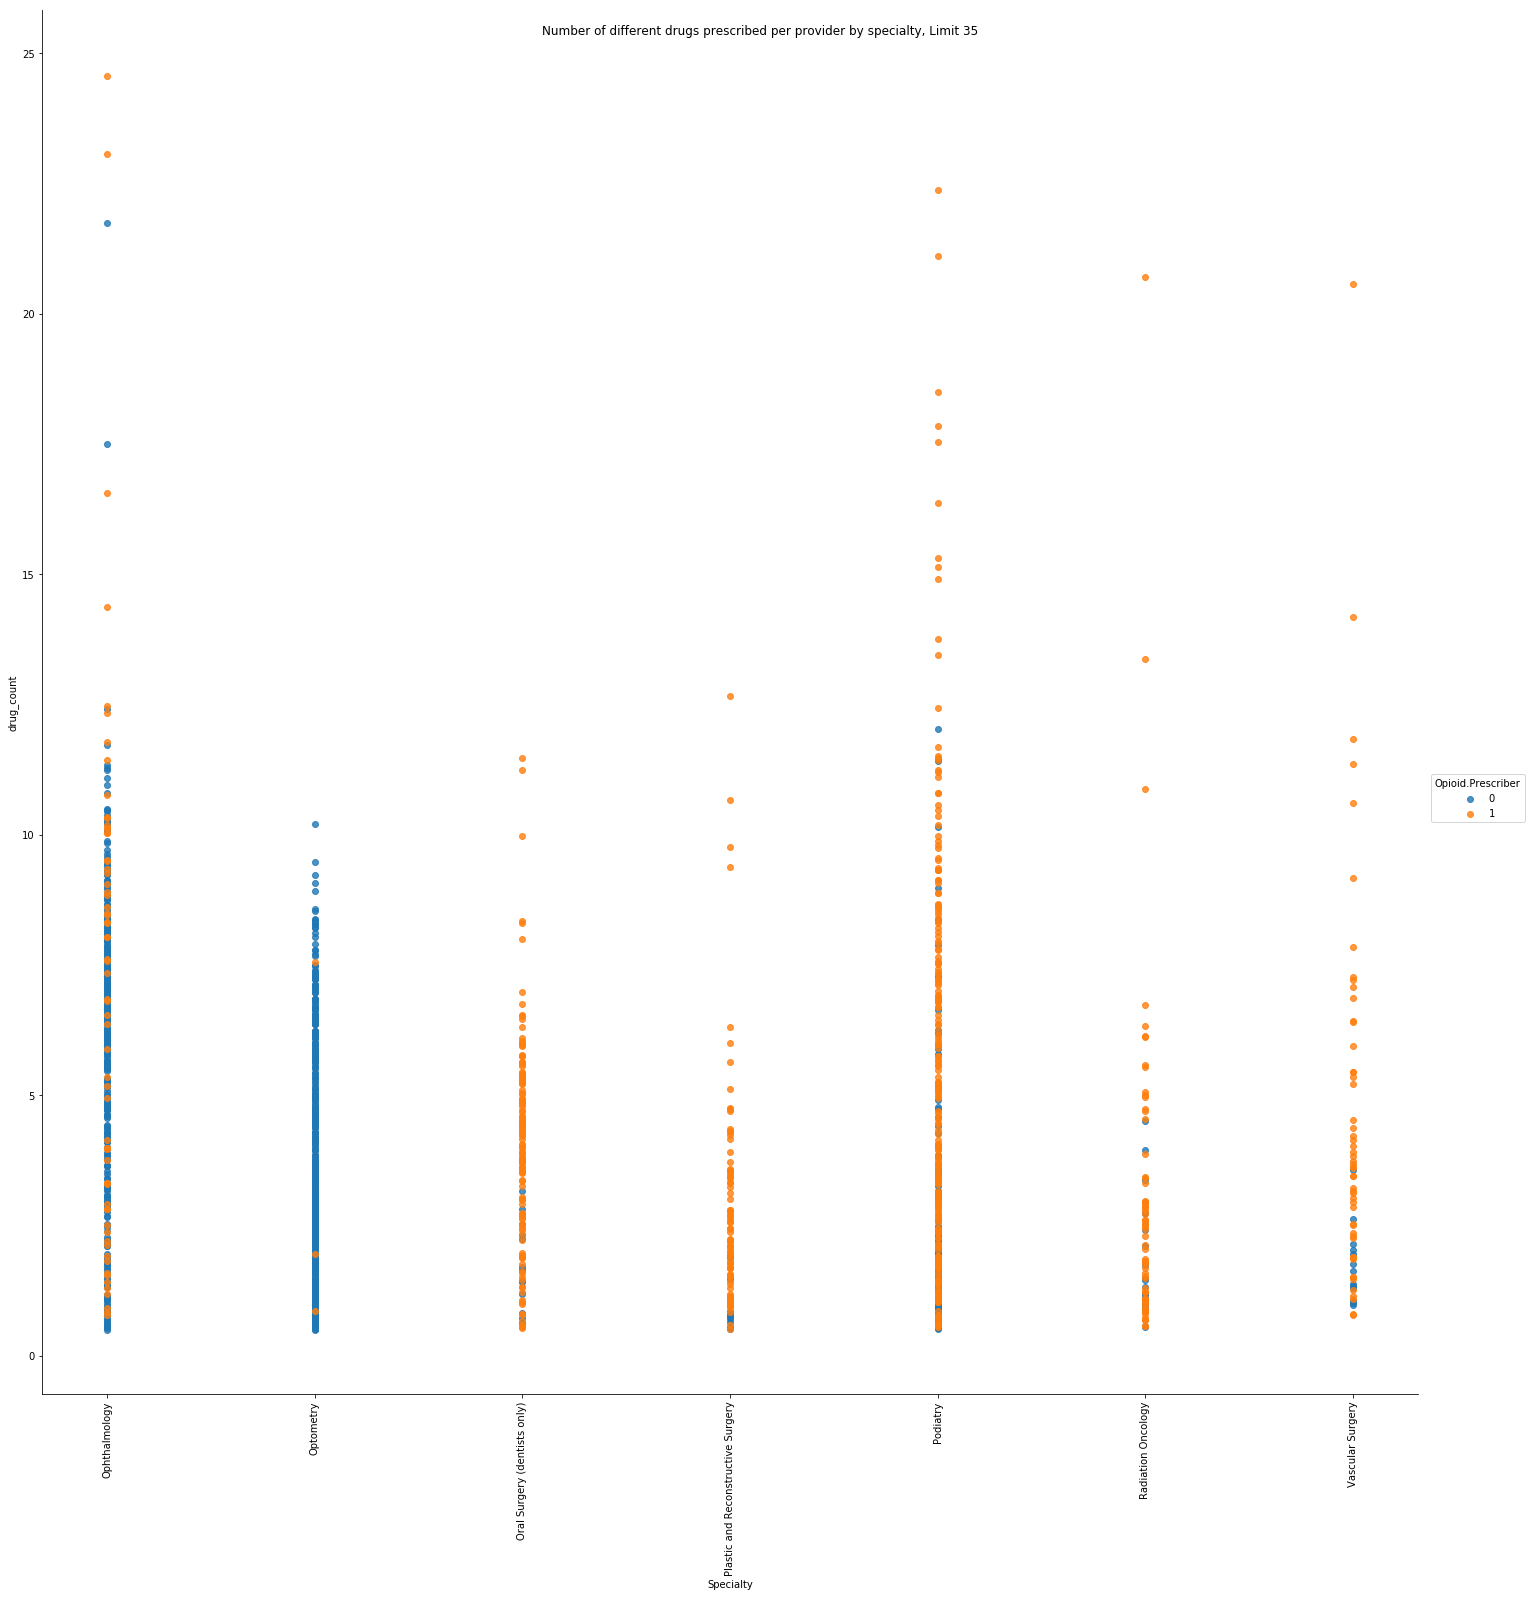

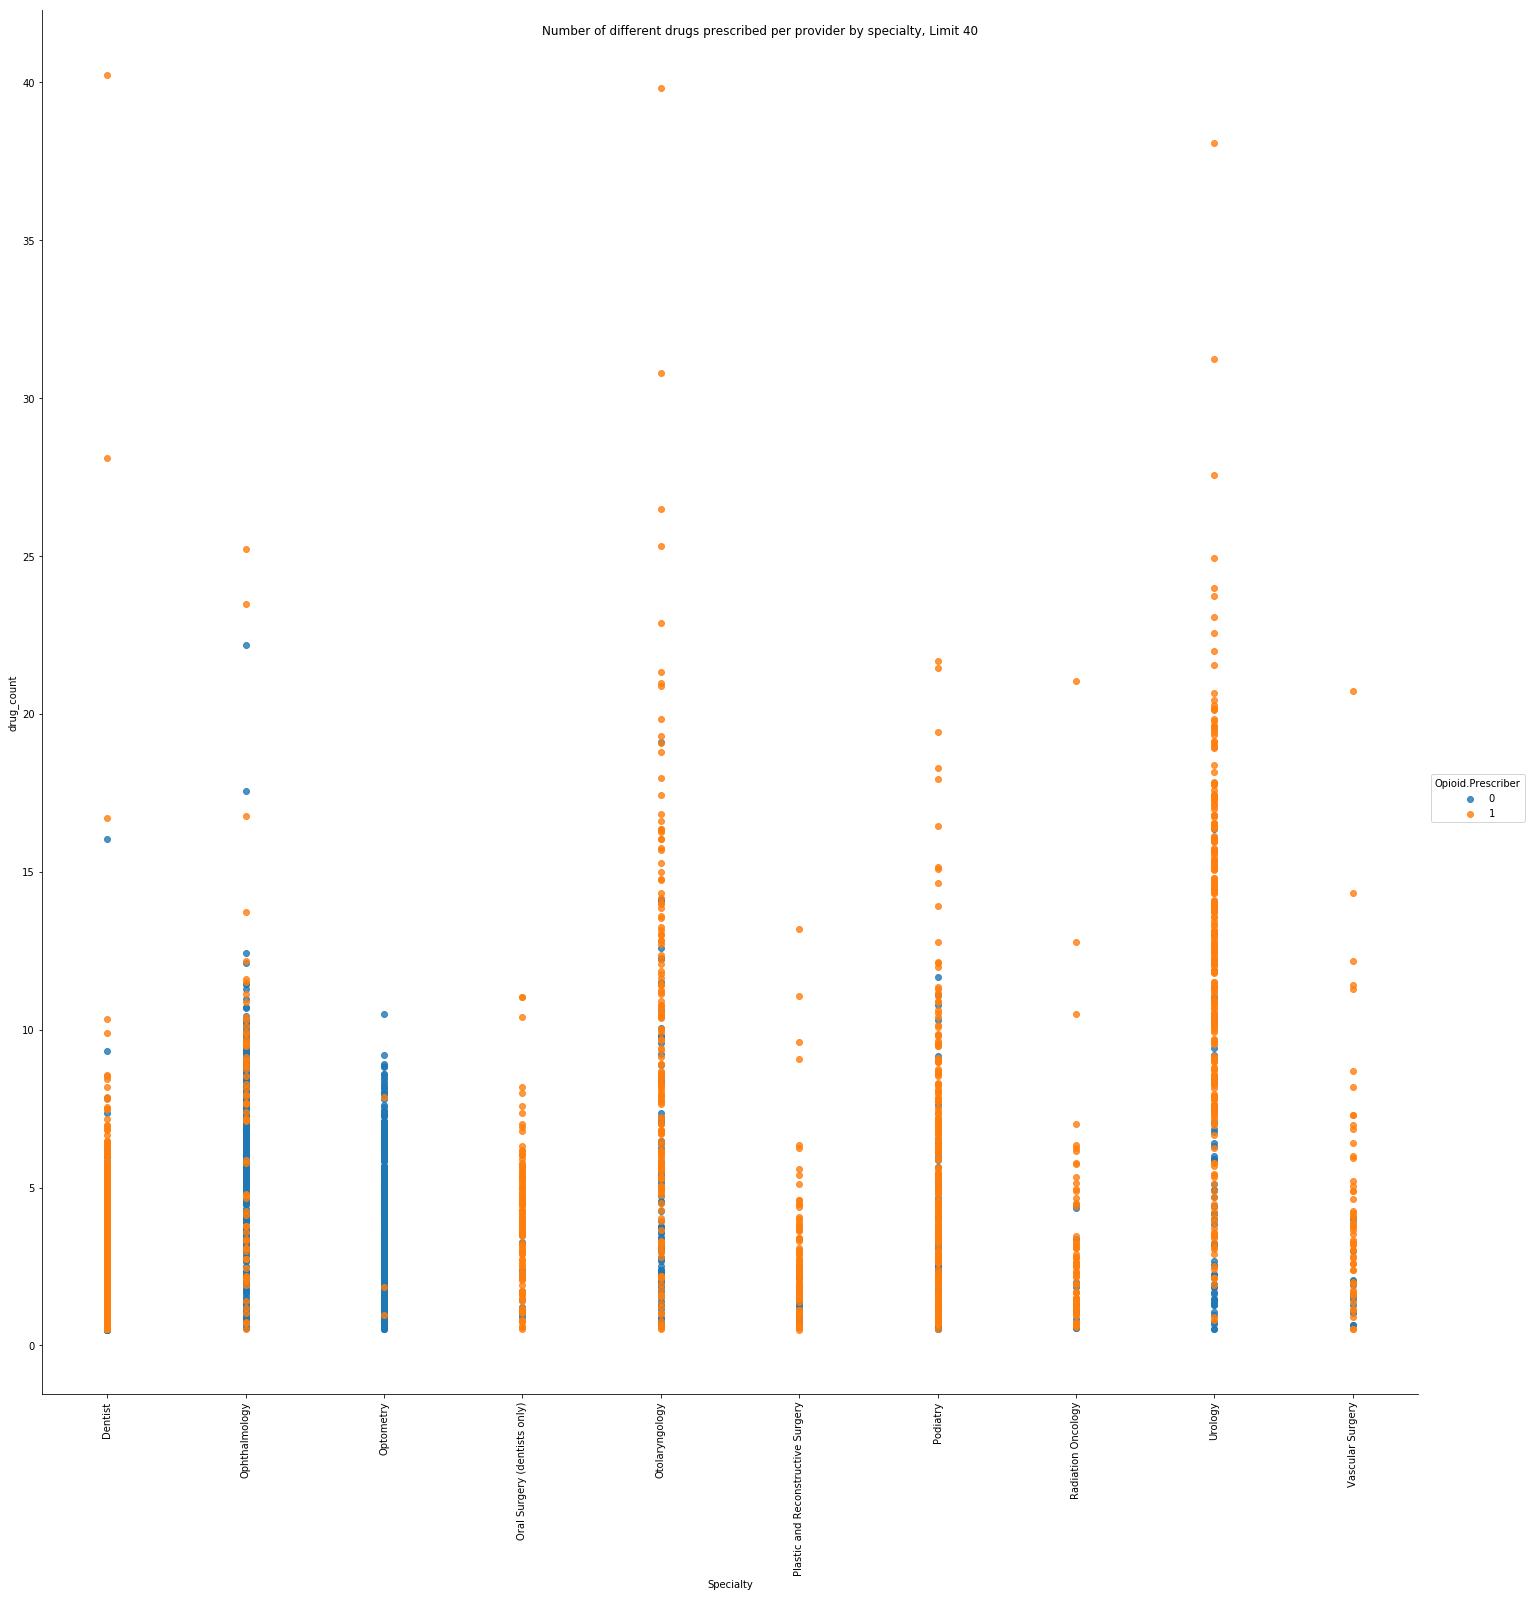

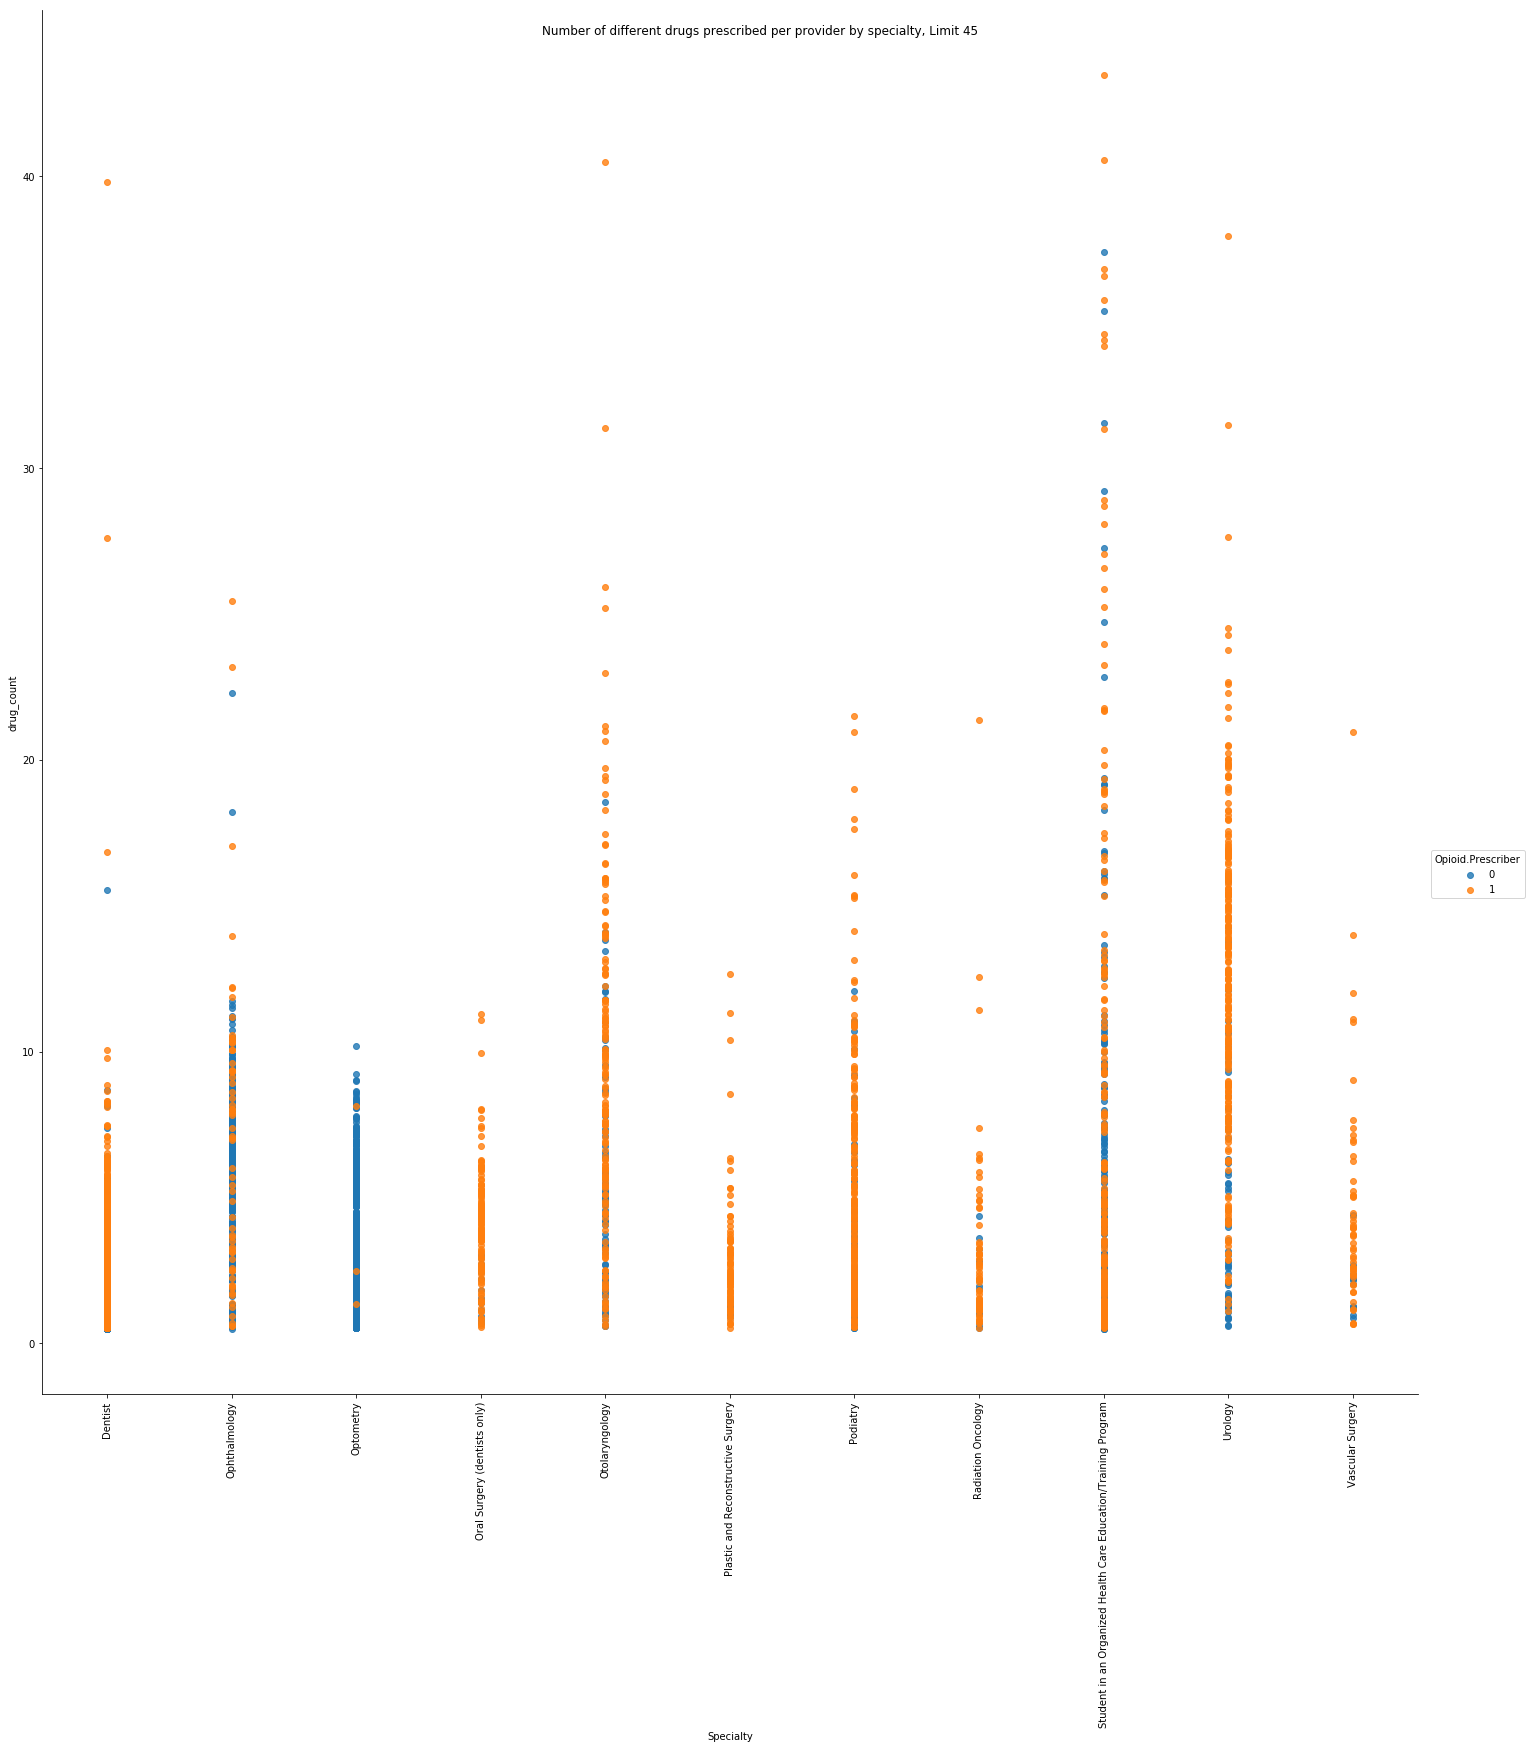

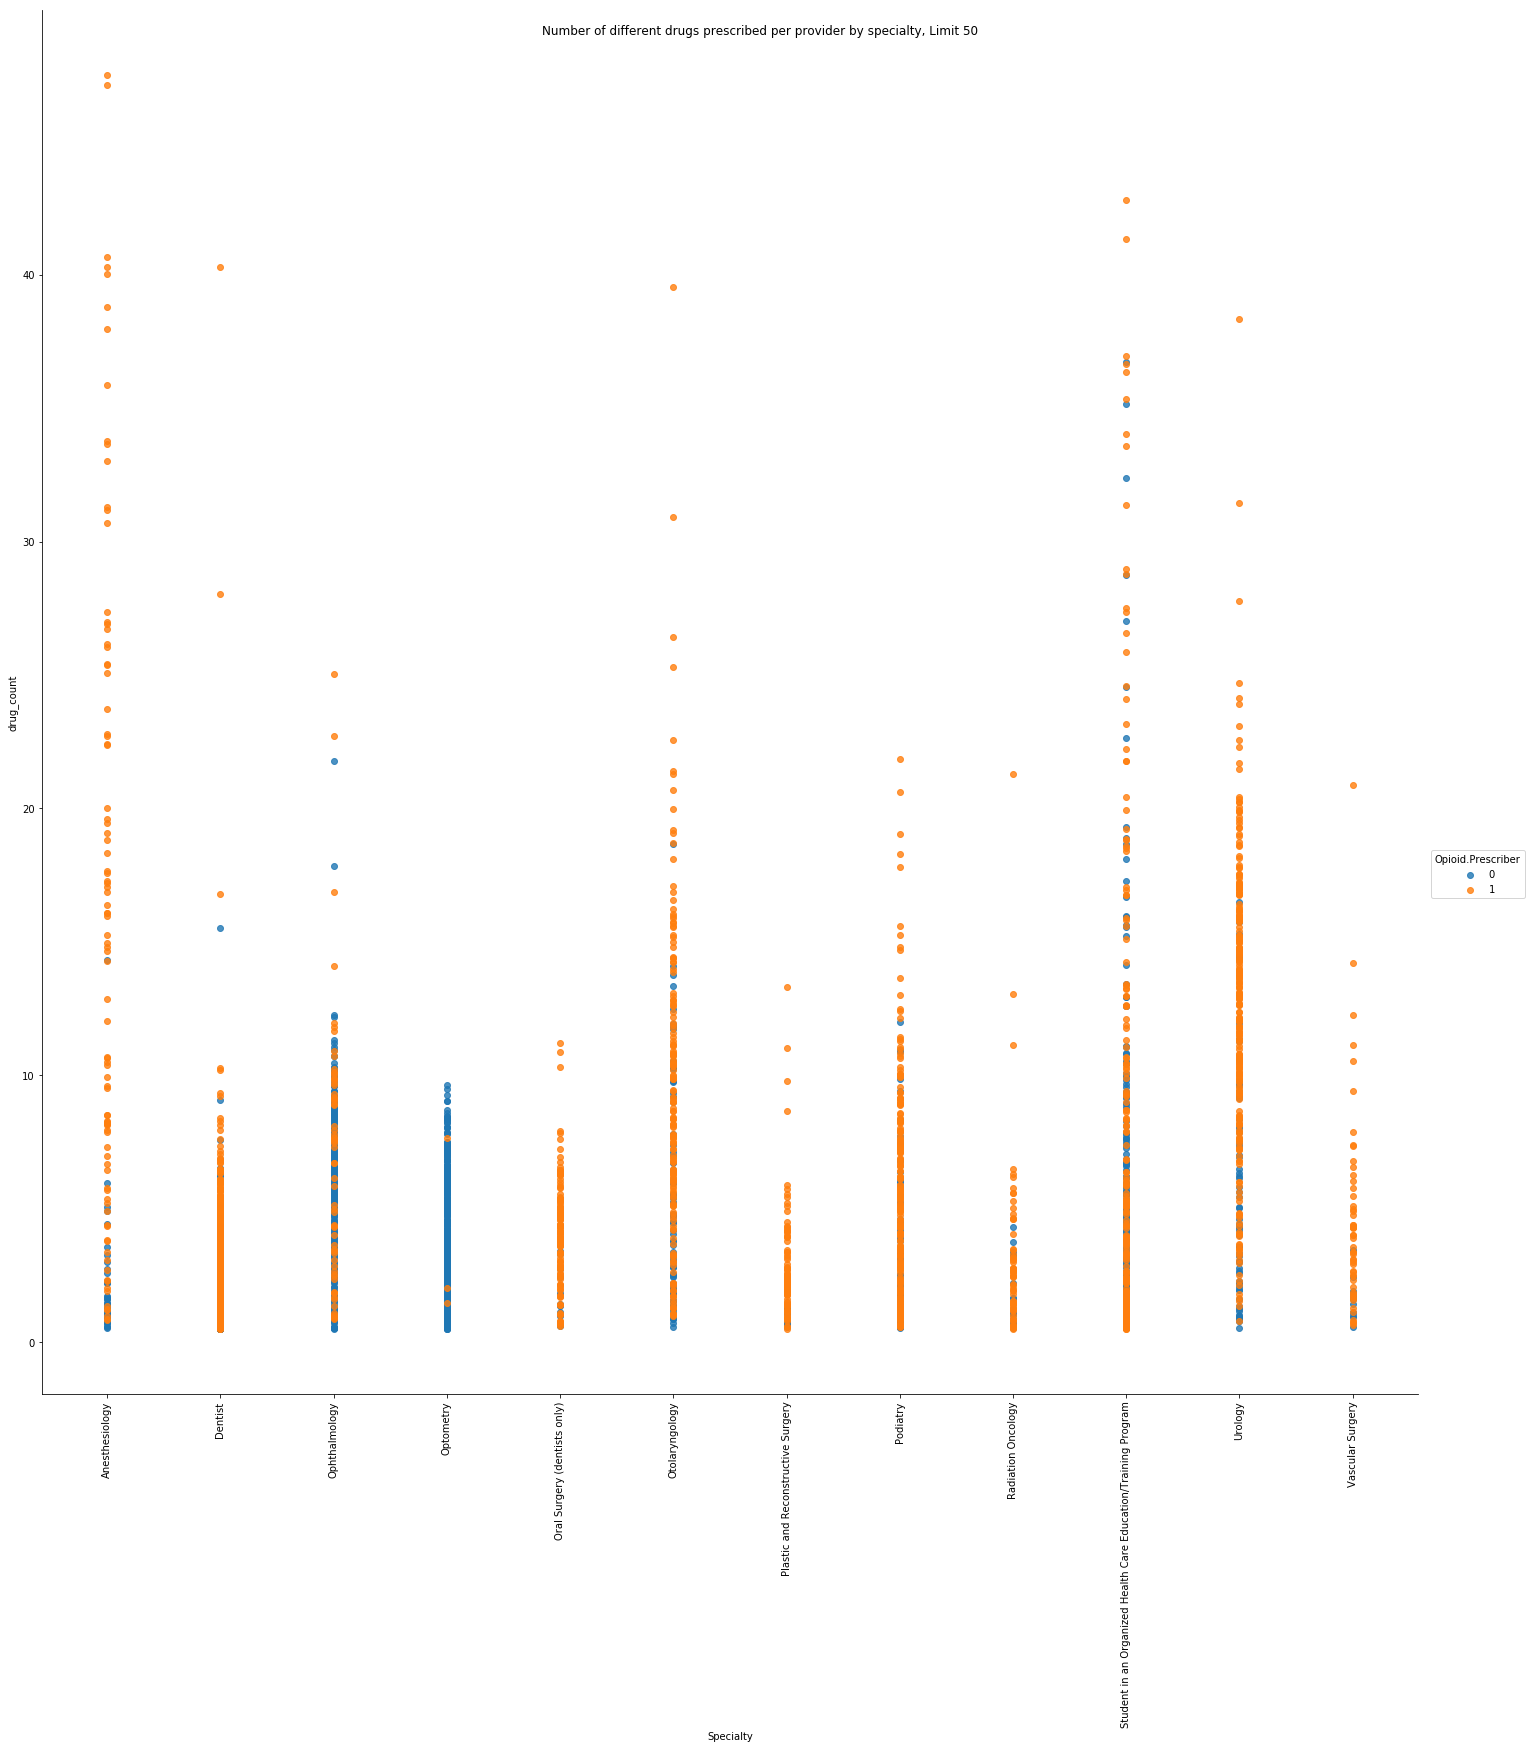

In [121]:
limit = 10
while (limit <=50):
    limit_specialties = (popular_specialty_prescribers.groupby(['Specialty'], sort=False)['drug_count'].max()<= limit)
    limit_specialties = limit_specialties[limit_specialties ==True]
    
    limit_drug = popular_specialty_prescribers.loc[popular_specialty_prescribers.Specialty.isin(limit_specialties.index)]
    limit_drug_specialties = sns.lmplot(x='Specialty', y = 'drug_count', hue='Opioid.Prescriber', y_jitter = .5, data=limit_drug, fit_reg=False, size=20)
    _ = limit_drug_specialties.set_xticklabels(rotation = 90)
    fig = limit_drug_specialties.fig 
    _ = fig.suptitle('Number of different drugs prescribed per provider by specialty, Limit {}'.format(limit))
    limit+=5

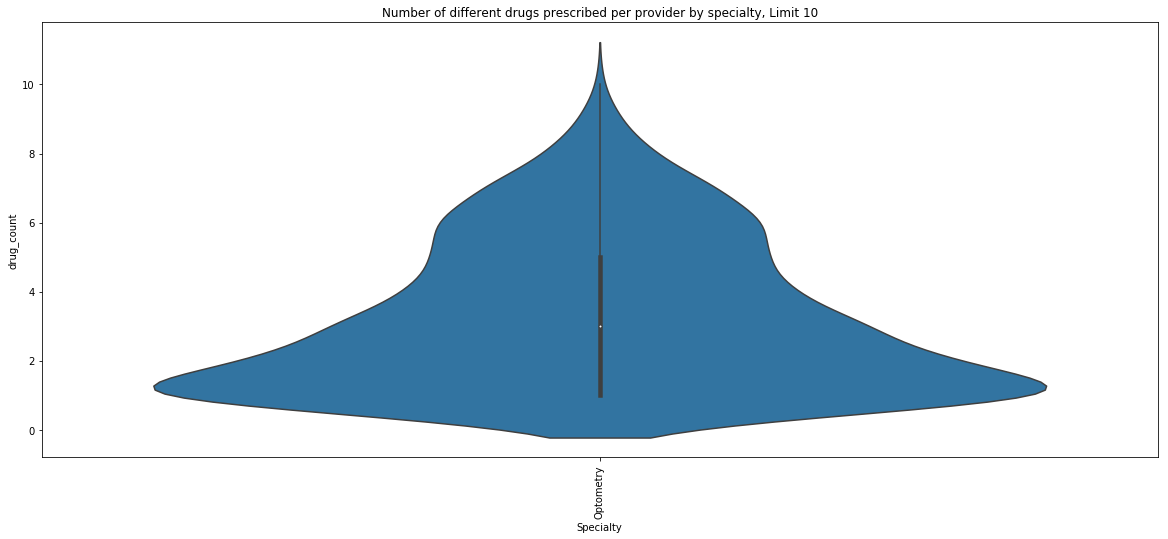

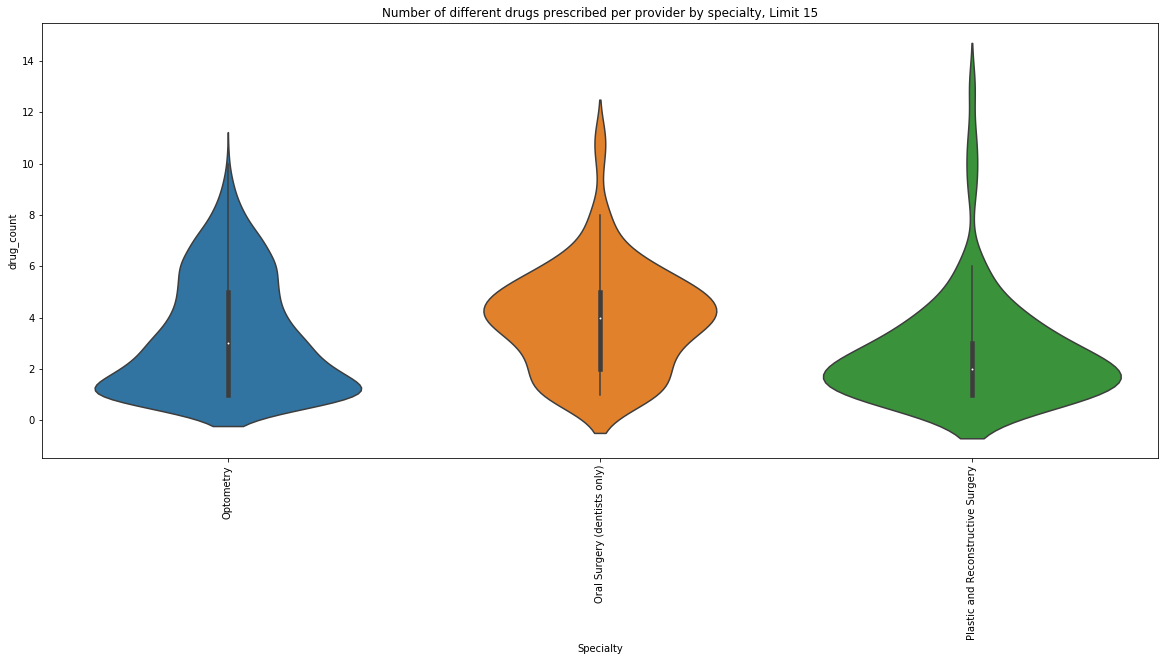

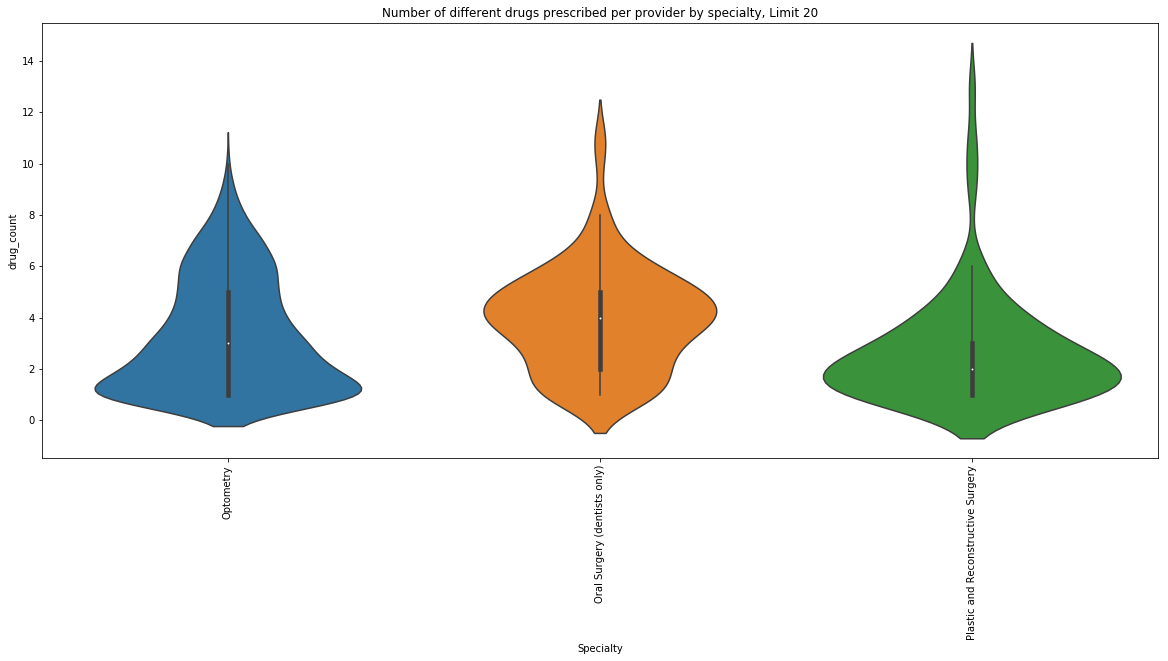

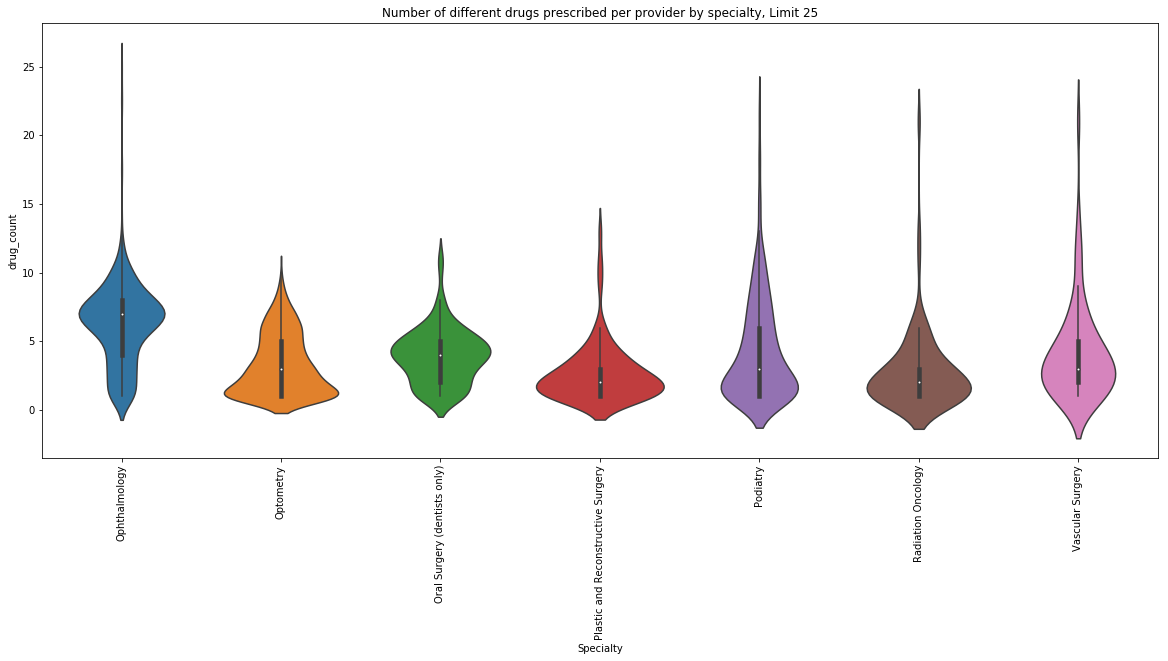

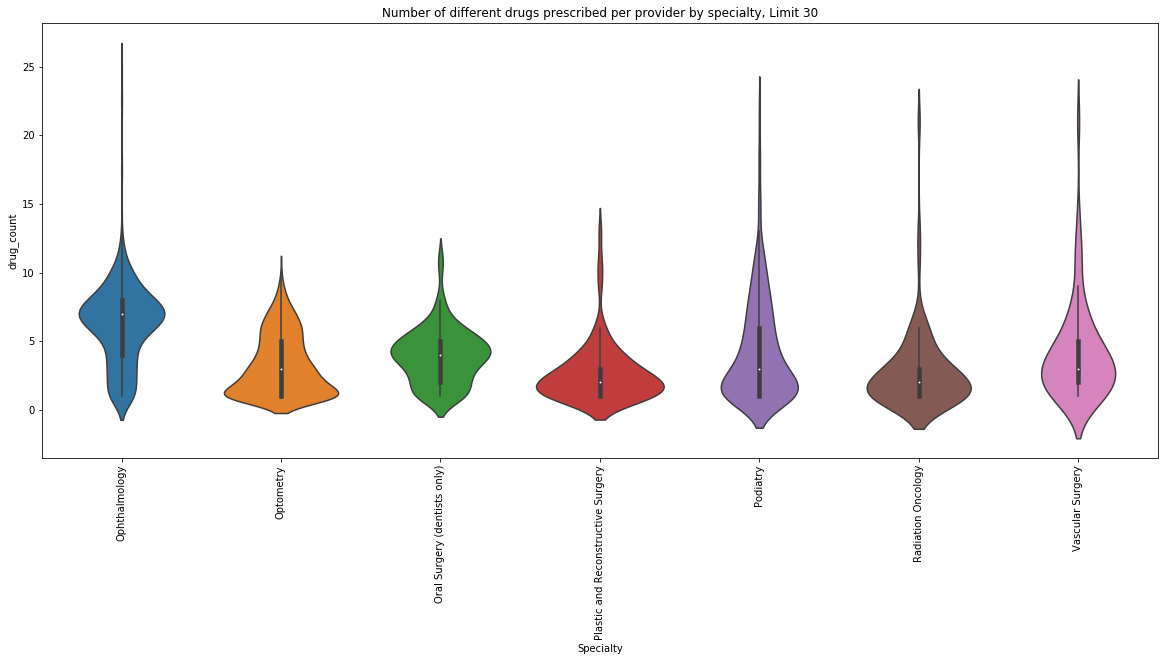

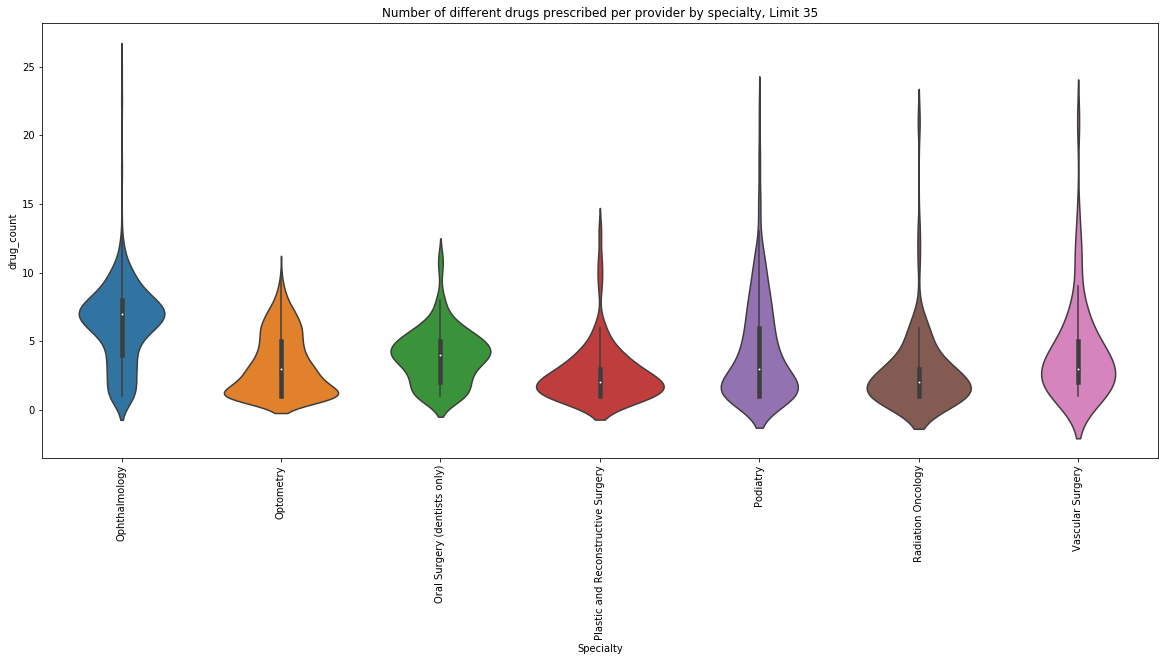

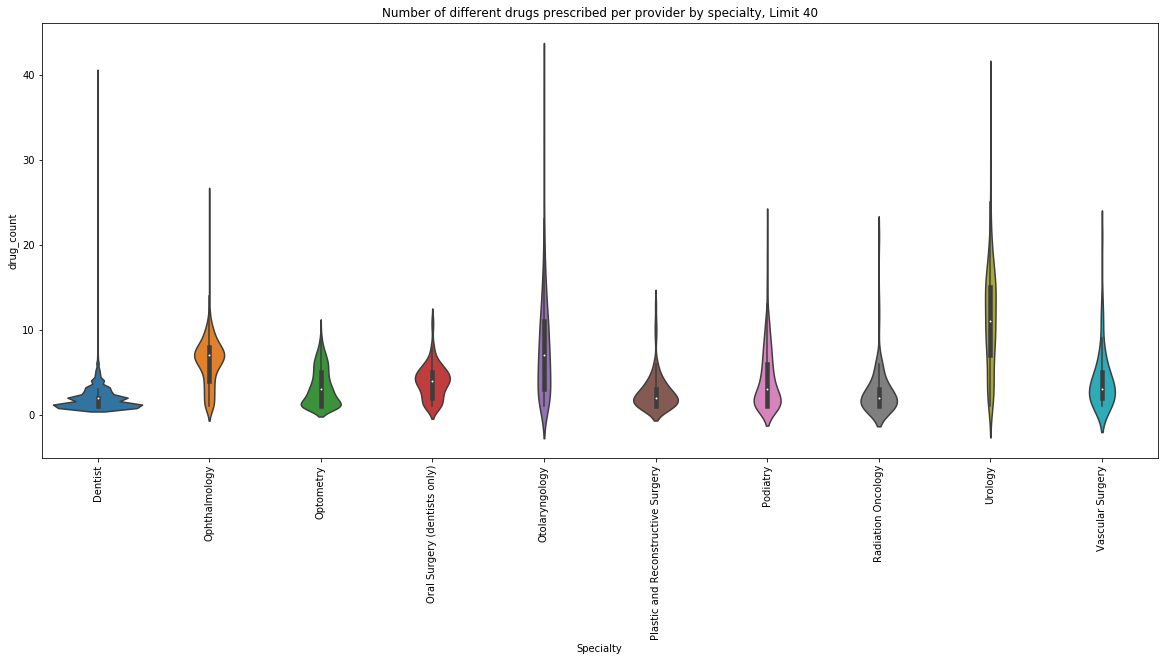

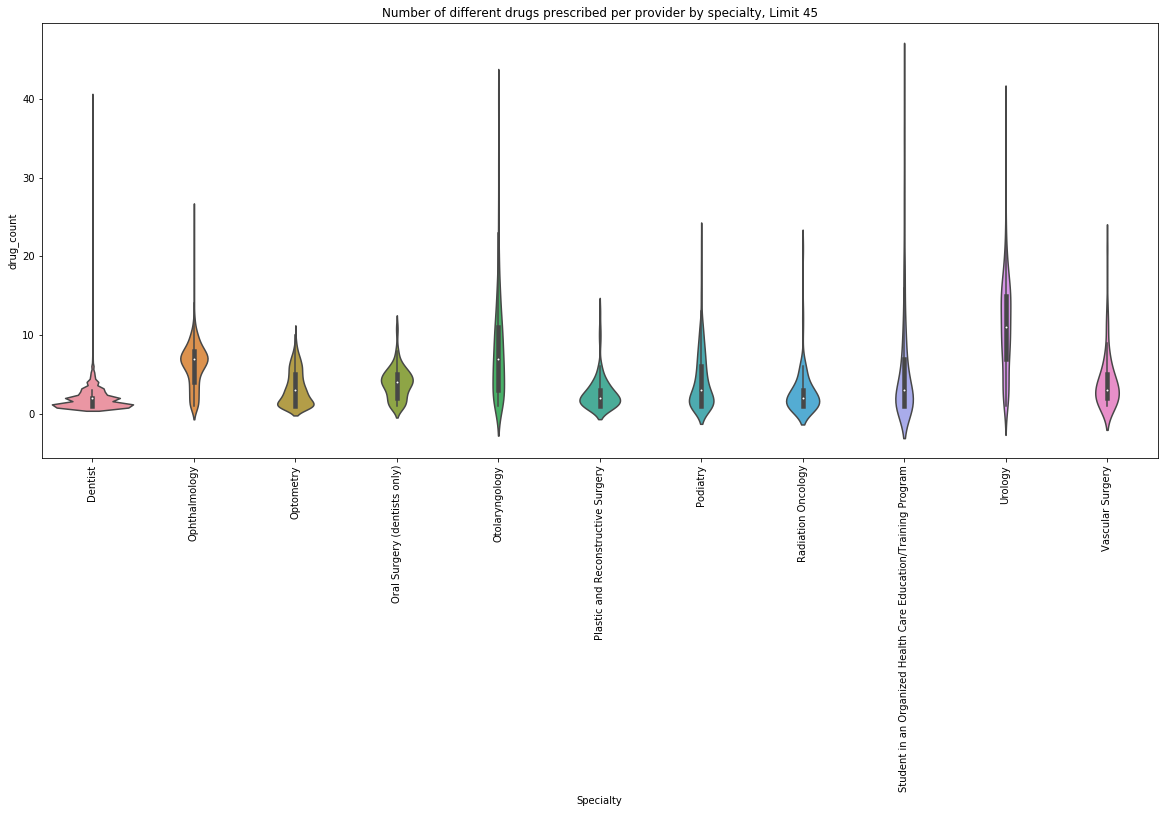

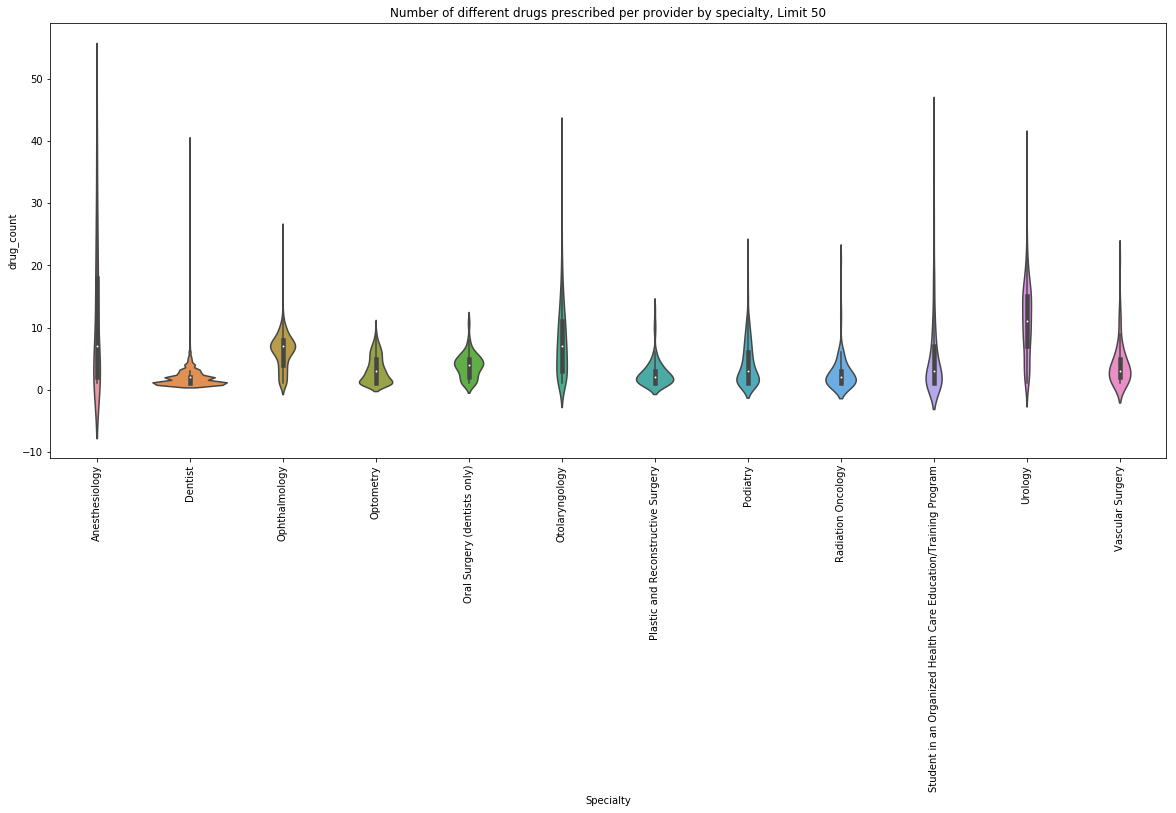

In [142]:
limit = 10
while (limit <=50):
    plt.subplots(figsize=(20,8))
    limit_specialties = (popular_specialty_prescribers.groupby(['Specialty'], sort=False)['drug_count'].max()<= limit)
    limit_specialties = limit_specialties[limit_specialties ==True]
    
    limit_drug = popular_specialty_prescribers.loc[popular_specialty_prescribers.Specialty.isin(limit_specialties.index)]
    limit_drug_specialties = sns.violinplot(x='Specialty', y = 'drug_count', data=limit_drug, size=20)
    _ = plt.xticks(rotation = 90)
    _ = plt.title('Number of different drugs prescribed per provider by specialty, Limit {}'.format(limit))
    plt.show()
    limit+=5

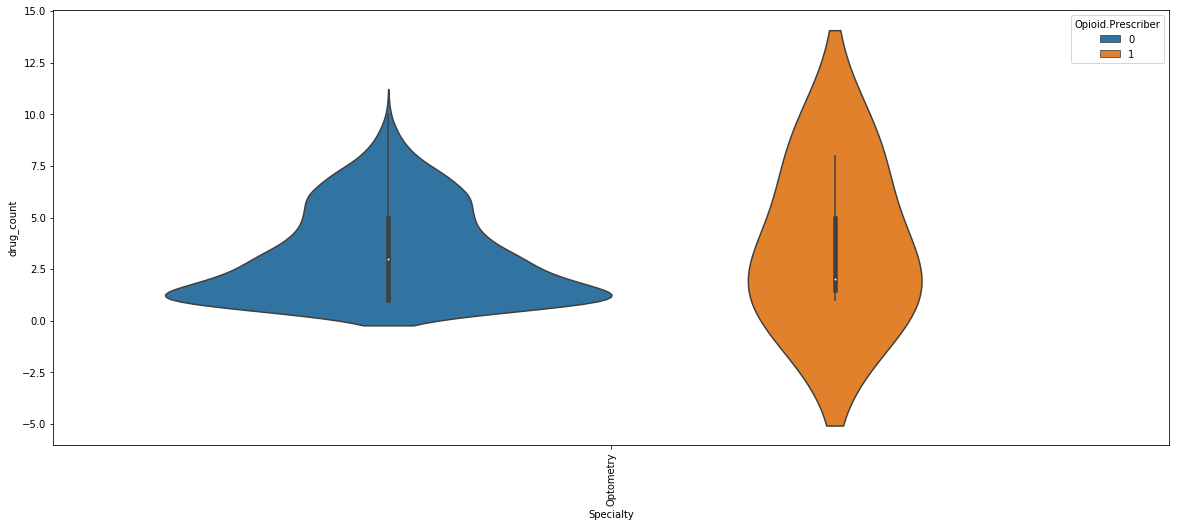

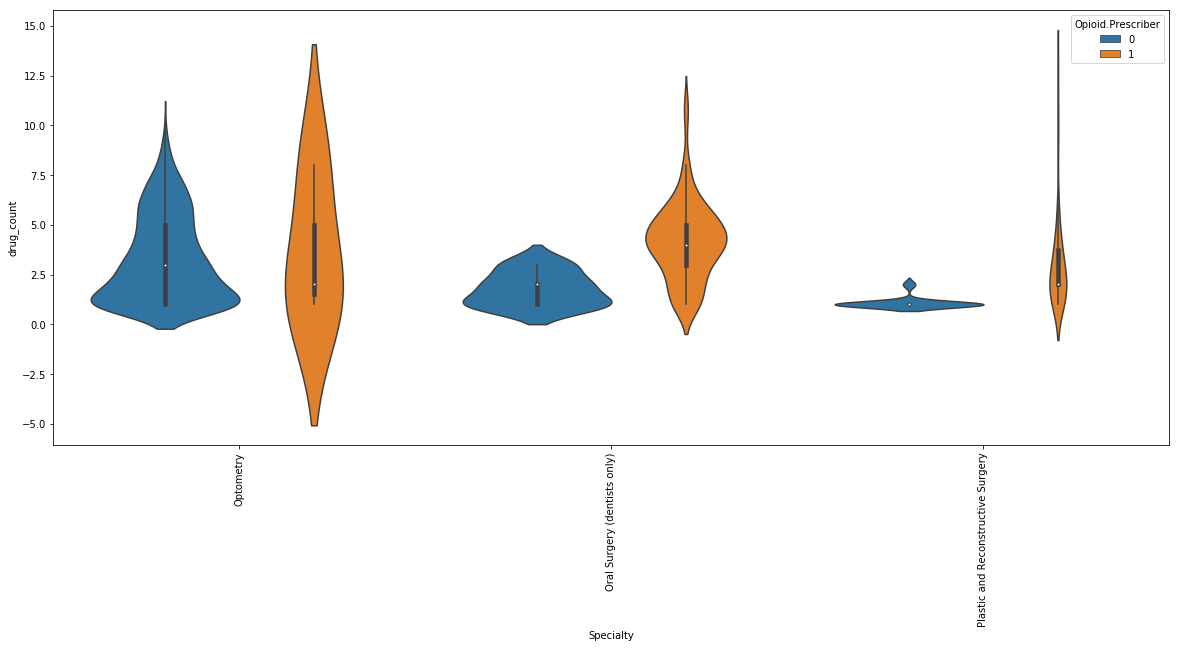

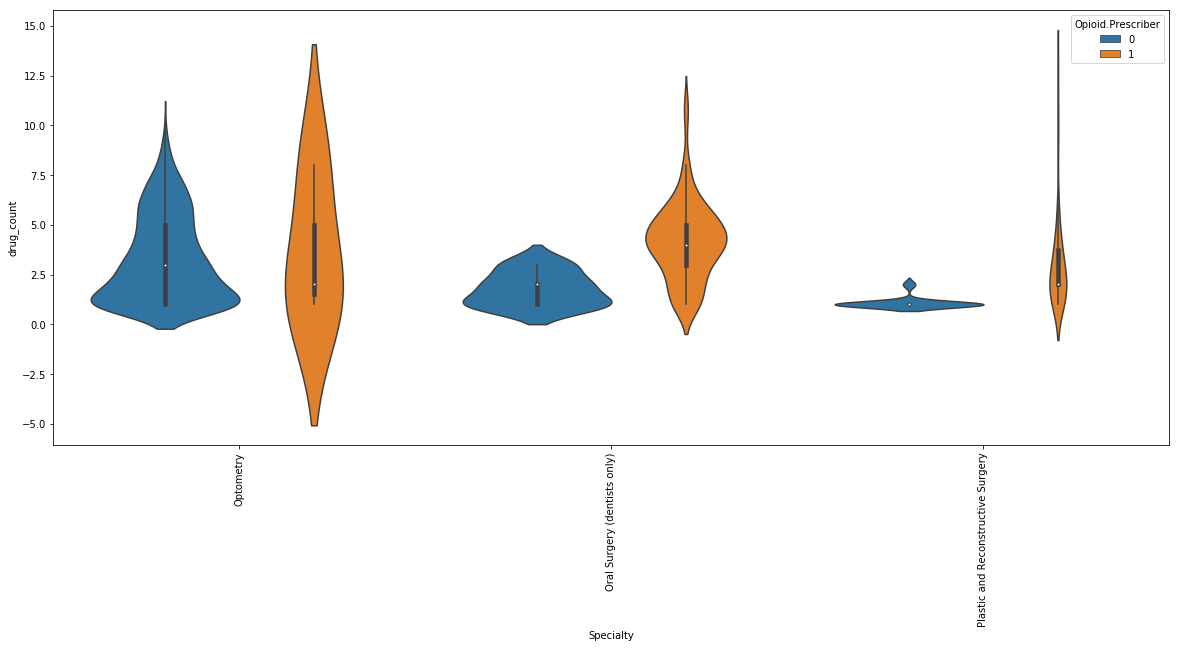

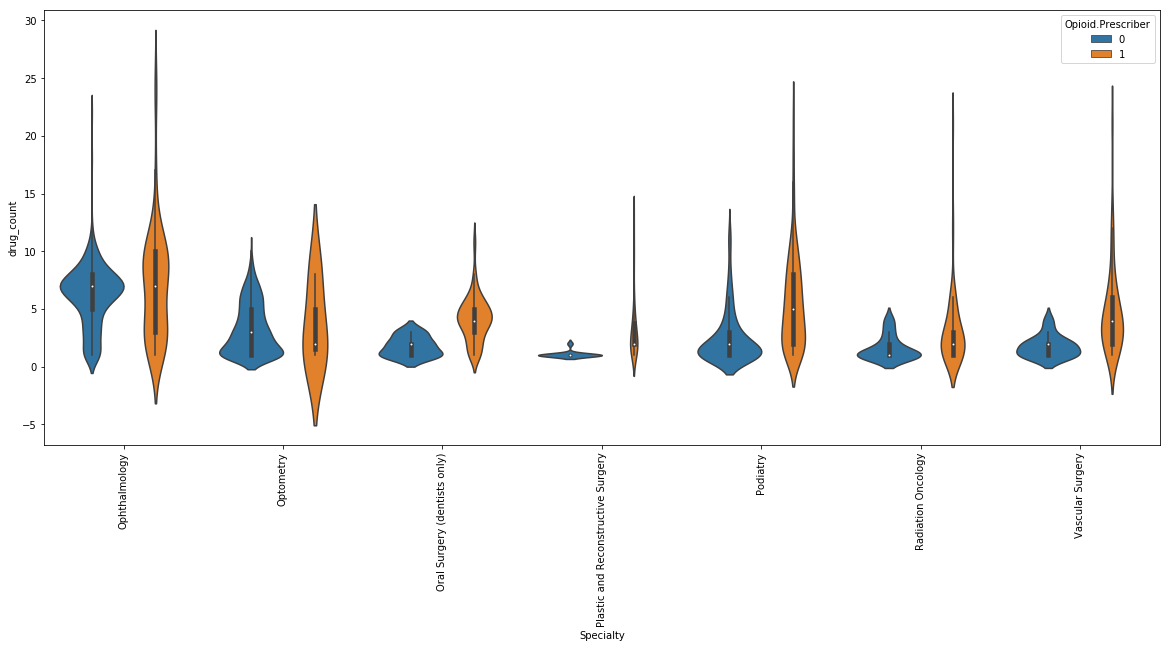

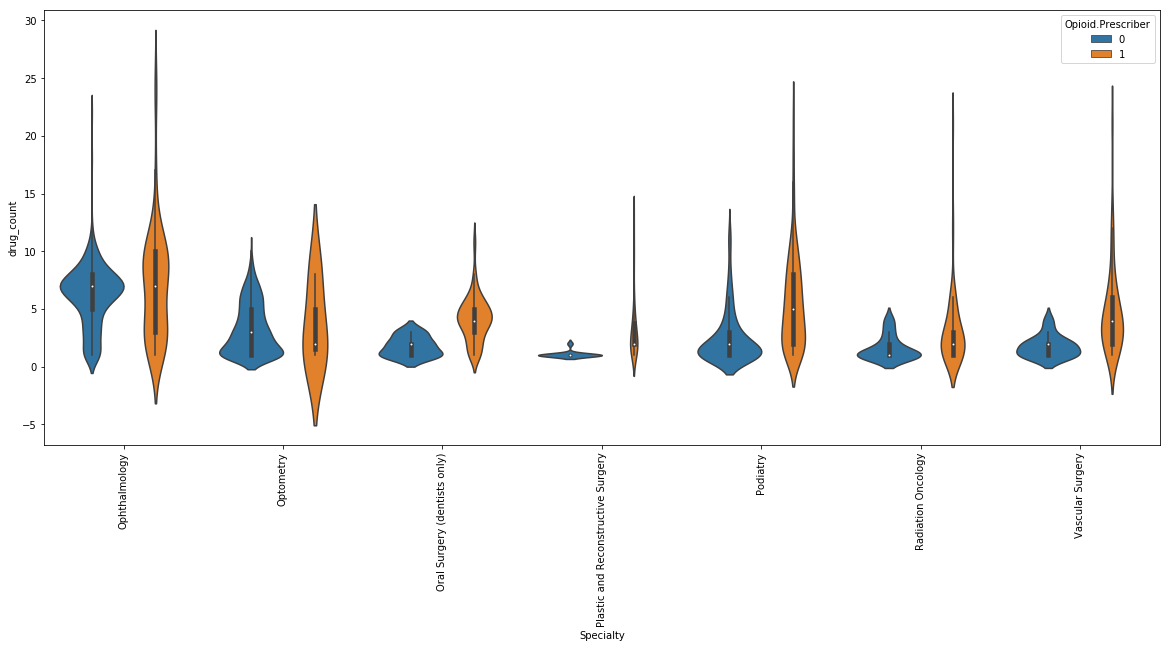

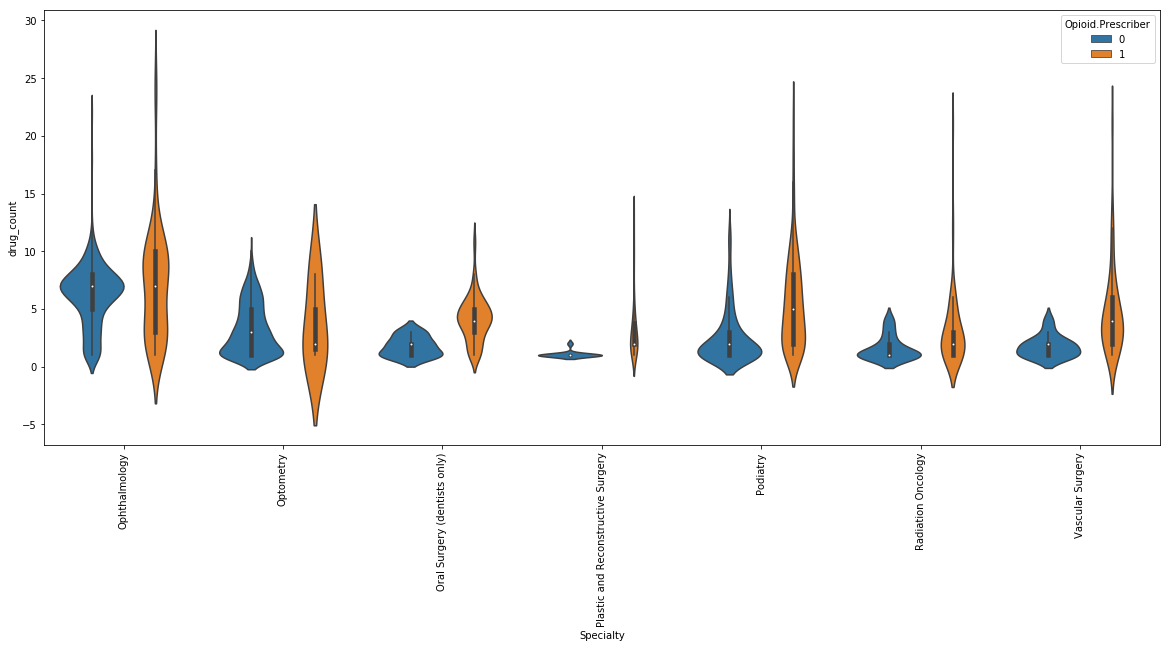

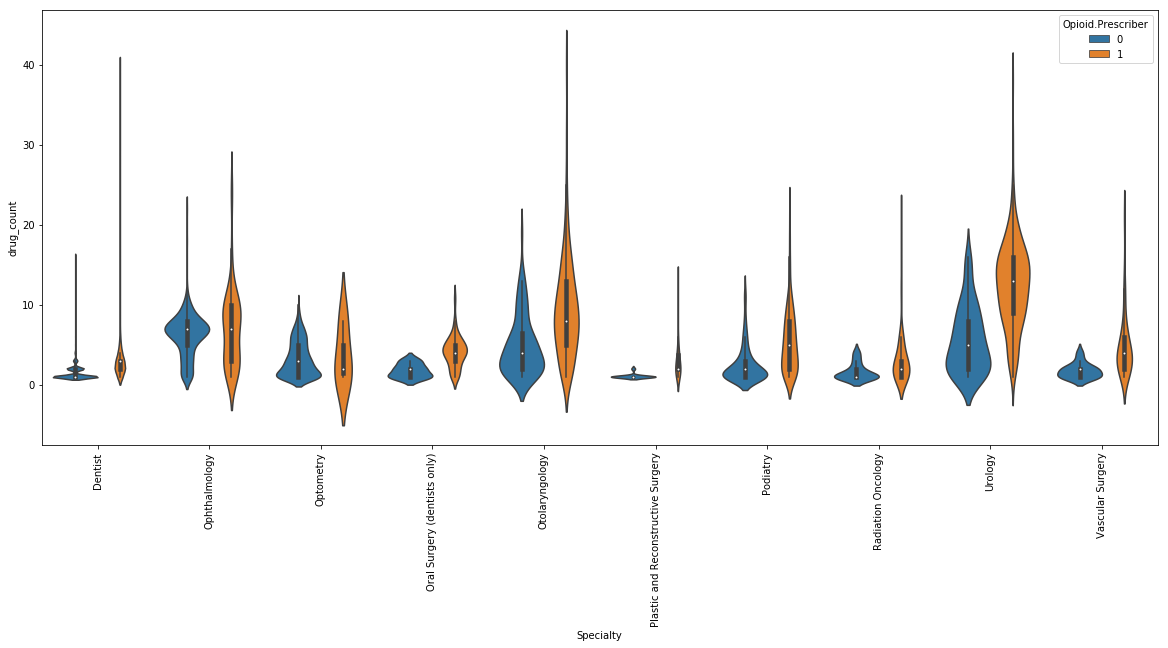

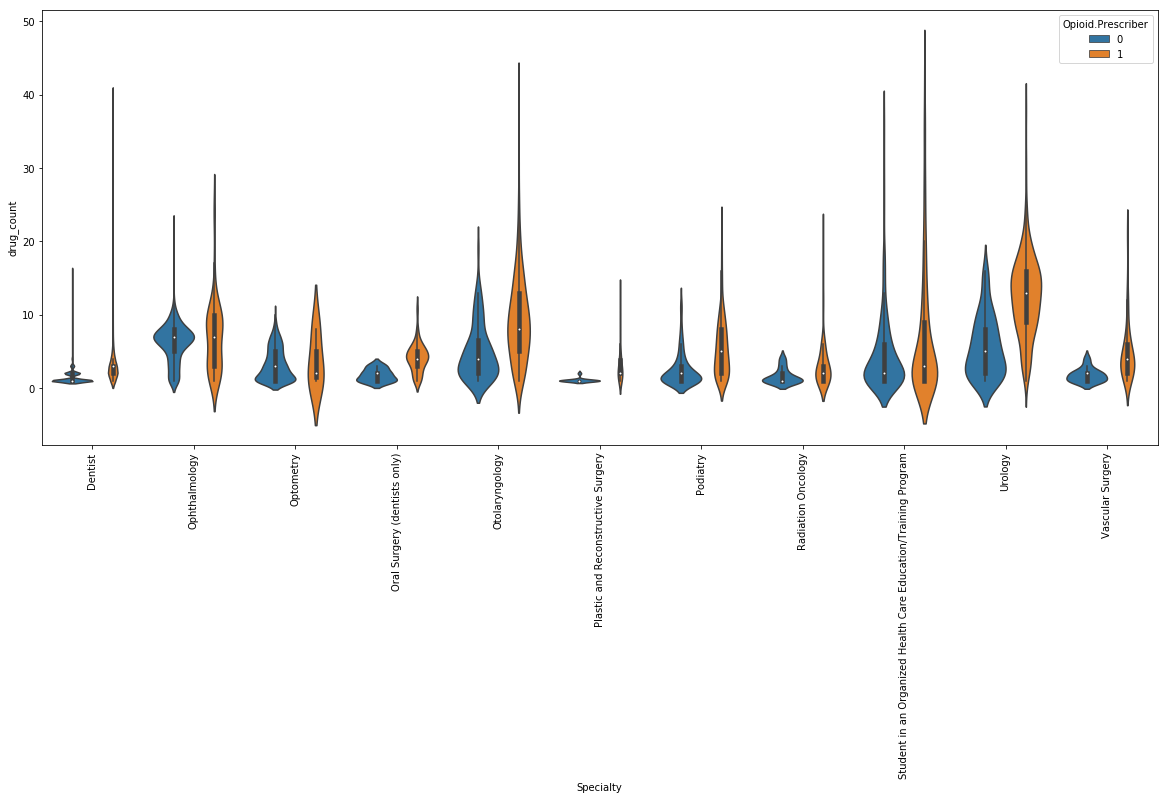

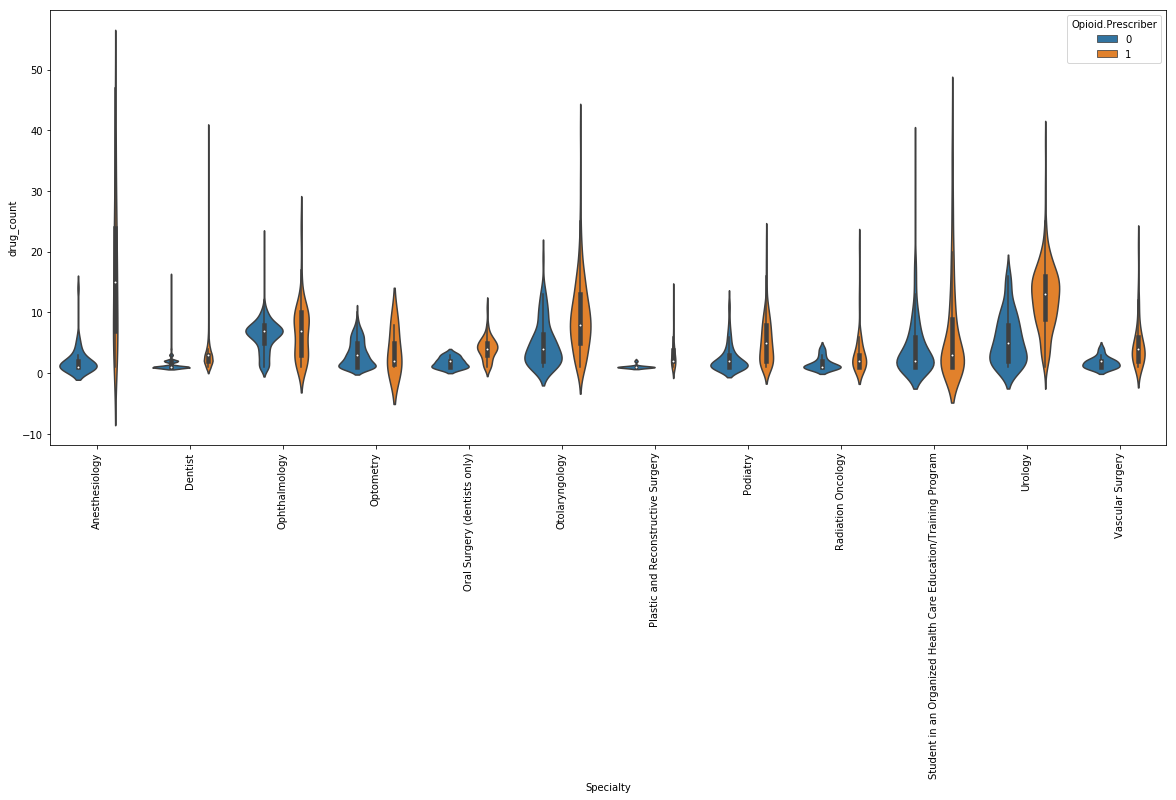

In [143]:
limit = 10
while (limit <=50):
    plt.subplots(figsize=(20,8))
    limit_specialties = (popular_specialty_prescribers.groupby(['Specialty'], sort=False)['drug_count'].max()<= limit)
    limit_specialties = limit_specialties[limit_specialties ==True]
    
    limit_drug = popular_specialty_prescribers.loc[popular_specialty_prescribers.Specialty.isin(limit_specialties.index)]
    limit_drug_specialties = sns.violinplot(x='Specialty', y = 'drug_count', hue='Opioid.Prescriber', data=limit_drug, size=20)
    _ = plt.xticks(rotation = 90)
    #fig = limit_drug_specialties.fig 
    #_ = fig.suptitle('Number of different drugs prescribed per provider by specialty, Limit {}'.format(limit))
    plt.show()
    limit+=5